**The problem**

Our problem is to determine an appropriate listing price for a new listing on Airbnb. Instead of predicting the actual listing price using regression, the objective is to predict which pricing bin or range is appropriate for a new listing. A multi-objective approach is used to predict the price range of a new listing, along with the type of rental being advertised. To do so, a multi-modality approach is also applied, whereby images of a listing along with an accompanying text summary are used for training.





**The inputs** for each listing is a text summary and an image.

**The predicted outputs** created by the model are type and price range.

The data mining functions required for this task are effective feature extraction from 2D images, along with effective feature extraction from a corpus of text.

**THE Challenges** 

could arise from using small image dimensions (64x64x2), which may not contain sufficient detail or information to accurately predict price ranges. Additionally, enforcing a maximum sequence length on the input text summaries could potentially omit useful information when training, and a vocabulary that is too big could add noise to the model. Also, developing an effective sequence model for the text portion of this task will need to address the exploding/vanishing gradient problem with a sequence of 300 timesteps. Specifically for this task, there is the added challenge of having both English and French text summaries for the listings, which will have a negative impact on the model in terms of generalization. Finally, our data have some missing values that should be droped even not affects our model performance.

**The impact,** 

Airbnb pricing is important to get right, particularly in big cities like London where there is lots of competition and even small differences in prices can make a big difference. It is also a difficult thing to do correctly — price too high and no one will book. Price too low and you’ll be missing out on a lot of potential income.

This project aims to solve this problem, by using Recurrent neural networks to predict the category of price for properties in London.

**An ideal solution**

will address these challenges to accurately classify the appropriate price range for new Airbnb listings. The impact of this solution would streamline the workflow for using Airbnb as a host, and could help strengthen relationships and build trust with consumers renting these properties. However, this could result in hosts tailoring their summaries to take advantage of consumers to augment the true appeal of their listings

**What is the experimental protocol used and how was it carried out?**

The experimental protocol or procedure used is as follows:

First, the training and test datasets for a set of rental properties are loaded into pandas dataframes. Images are loaded as greyscale (2 channels), and re-sized into size 64x64x2. Text summaries are also loaded as strings. Price and rental type labels are also loaded, and categorically encoded.

Next, the training and validation splits are created for the two sets of inputs (images and summaries), as well as the two labels (price and type), where a hold-out validation set of 20% is used.

Then, the text data is preprocessed by first fitting a tokenizer on all of the text summaries. 

Subsequently, the model is defined for this multi-objective task as follows. Embeddings are generated for the input text, and the average of the embeddings is computed for each sequence. A feature vector is created for the input images by passing their values through a 2D convolutional layer, using 2D max-pooling to reduce the size, and then flattening that output. These output vectors are concatenated and passed to a dense layer using softmax activation to perform separate multi-class classification tasks on price and type labels The model uses Adam for tuning weights, sparse categorical cross-entropy loss, and sparse categorical accuracy for evaluation for both objectives. The loss with respect to each task is weighted equally when computing the overall loss of the model. We use the sparse version of these metrics as our categorical labels are integers instead of being one-hot encoded.


**Welcome to the hardest competition**

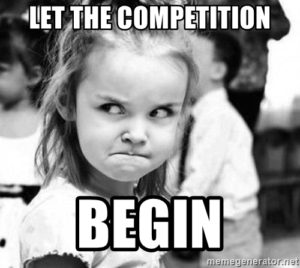

**preparation for loading the data to begin the competition**

In [1]:
import os
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
# from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
import pandas as pd
from tqdm.notebook import tqdm
from PIL import Image
import pandas as pd
import os
import numpy as np
from ast import literal_eval

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/comp4/copy-of-cisc-873-dm-w23-a4.zip


Streaming output truncated to the last 5000 lines.
  inflating: a4/img_train/3366.jpg   
  inflating: a4/img_train/3367.jpg   
  inflating: a4/img_train/3368.jpg   
  inflating: a4/img_train/3369.jpg   
  inflating: a4/img_train/337.jpg    
  inflating: a4/img_train/3370.jpg   
  inflating: a4/img_train/3371.jpg   
  inflating: a4/img_train/3372.jpg   
  inflating: a4/img_train/3373.jpg   
  inflating: a4/img_train/3374.jpg   
  inflating: a4/img_train/3375.jpg   
  inflating: a4/img_train/3376.jpg   
  inflating: a4/img_train/3377.jpg   
  inflating: a4/img_train/3378.jpg   
  inflating: a4/img_train/3379.jpg   
  inflating: a4/img_train/338.jpg    
  inflating: a4/img_train/3380.jpg   
  inflating: a4/img_train/3381.jpg   
  inflating: a4/img_train/3382.jpg   
  inflating: a4/img_train/3383.jpg   
  inflating: a4/img_train/3384.jpg   
  inflating: a4/img_train/3385.jpg   
  inflating: a4/img_train/3386.jpg   
  inflating: a4/img_train/3387.jpg   
  inflating: a4/img_train/3388.jpg   

In [91]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_score,recall_score, f1_score,precision_recall_curve
sns.set()
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from time import time
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import PredefinedSplit

import re
import pickle
import holoviews as hv
import nltk 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [92]:
from tqdm.notebook import tqdm
from PIL import Image
import os
from ast import literal_eval

In [93]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, GRU, LSTM, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam

**load the data**

In [94]:
#read train and test files
train_data= pd.read_csv('a4/train_xy.csv')
test_data= pd.read_csv('a4/test_x.csv')
     

**information about the data**

In [95]:
train_data.shape

(7627, 4)

In [96]:
test_data.shape

(7360, 3)

In [97]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  7326 non-null   object
 1   image    7627 non-null   object
 2   type     7627 non-null   object
 3   price    7627 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 238.5+ KB


In [98]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7360 entries, 0 to 7359
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       7360 non-null   int64 
 1   summary  7360 non-null   object
 2   image    7360 non-null   object
dtypes: int64(1), object(2)
memory usage: 172.6+ KB


In [99]:
train_data.head()

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0


In [100]:
test_data.head()

,id,summary,image
0,0,Charming warm house is ready to host you here ...,img_test/0.jpg
1,1,"La chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg
2,2,Grande chambre confortable située au sous-sol ...,img_test/2.jpg
3,3,"Près d’un Métro, ligne orange. 10 minutes à pi...",img_test/3.jpg
4,4,Very bright appartment and very cosy. 2 separa...,img_test/4.jpg


In [101]:
#Check the  train data for missing values in training data
train_data.isnull().sum()

summary    301
image        0
type         0
price        0
dtype: int64

In [102]:
#Check the train  data for duplicates 
train_data.duplicated().any()
     

False

In [103]:
train_data['type'].value_counts()


Apartment                 5765
Condominium                691
House                      406
Loft                       324
Townhouse                  167
Serviced apartment          77
Bed and breakfast           38
Guest suite                 32
Hostel                      26
Bungalow                    25
Guesthouse                  14
Cottage                     12
Aparthotel                  12
Boutique hotel              10
Other                        8
Villa                        7
Tiny house                   3
Boat                         2
Cabin                        2
Camper/RV                    2
Casa particular (Cuba)       1
Hotel                        1
Earth house                  1
Castle                       1
Name: type, dtype: int64

In [104]:
#the only feature that have null values
train_data['summary'].value_counts()


Featured in The New York Times, The Wall Street Journal, and Fast Company, we’ve hosted over 350k guests in 2,500+ spaces with an average rating of 4.6 stars. Each space is designed and run by us, so you’ll always know what to expect from your stay. At Sonder, we’ve combined the best parts of home and hotel. - 24/7 support via text, email, or phone - Coffee, fresh towels, and bathroom essentials provided - Hotel-standard cleaning before you arrive - Self check-in                        88
- Fully furnished apartment in the heart of downtown Montreal - WIFI (high speed internet), stove, refrigerator, heating, hot water and necessary furniture are included - Near Concordia University, Mcgill University, Université de Montréal, Lassale College, HEC, UQAM, Metro Guy Concordia, hospitals & restaurant  - Indoor parking available on demand                                                                                                                                              9
• Very comfo

In [105]:
train_data.describe()

,price
count,7627.000000
mean,0.442769
std,0.611946
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [106]:
#describe the text column
train_data['summary'].describe()

count                                                  7326
unique                                                 6844
top       Featured in The New York Times, The Wall Stree...
freq                                                     88
Name: summary, dtype: object

In [107]:
#check the target column 
train_data['price'].value_counts()

0    4737
1    2403
2     487
Name: price, dtype: int64

In [108]:

# Distribution of label
train_data["price"].value_counts(normalize=True)

0    0.621083
1    0.315065
2    0.063852
Name: price, dtype: float64

**preprocess the data**


1: resize the image

2: tokenization on text data

3: converting to integer ID 

4: padding equal post to text data

5: resize image for image input data

In [109]:
from sklearn.model_selection import train_test_split

# labels:
train_data['price'] = train_data.price.astype('category').cat.codes
train_data['type'] = train_data.type.astype('category').cat.codes


In [110]:
price_length = len(train_data.price.unique())
type_length= len(train_data.type.unique())
     

In [111]:
df_train1=train_data

In [112]:
df_train1.head()

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,1,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,1,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,1,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,1,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,1,0


In [113]:
df_train1.shape

(7627, 4)

In [114]:
df_train1.isnull().sum()


summary    301
image        0
type         0
price        0
dtype: int64

In [115]:
#drop the rows which have null values
df_train1.dropna(axis = 0, inplace = True)

In [116]:
df_train1.isnull().sum()


summary    0
image      0
type       0
price      0
dtype: int64

In [117]:
df_train1.shape

(7326, 4)

In [118]:
#converting the type of "type" column to categorical and encode it 
df_train1['type']=df_train1.type.astype('category')
df_train1['type_codes'] = df_train1.type.astype('category').cat.codes

In [119]:
df_train1['type_codes']

0        1
1        1
2        1
3        1
4        1
        ..
7622     1
7623     1
7624     1
7625     1
7626    17
Name: type_codes, Length: 7326, dtype: int8


https://www.analyticsvidhya.com/blog/2021/05/how-to-use-progress-bars-in-python/

https://www.educative.io/answers/what-is-astliteralevalnodeorstring-in-python

In [120]:

import os
from tqdm.notebook import tqdm
from PIL import Image
from ast import literal_eval

In [121]:
# preprocess image data

def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((64, 64))
        arr = np.array(image)
    except:
        arr = np.zeros((64, 64, 2))
    return arr




In [122]:
# loading images:
image_FS  = np.array([load_image("/content/a4/"+i) for i in tqdm(df_train1.image)])
x_test_image = np.array([load_image("/content/a4/"+i) for i in tqdm(test_data.image)])

  0%|          | 0/7326 [00:00<?, ?it/s]

  0%|          | 0/7360 [00:00<?, ?it/s]

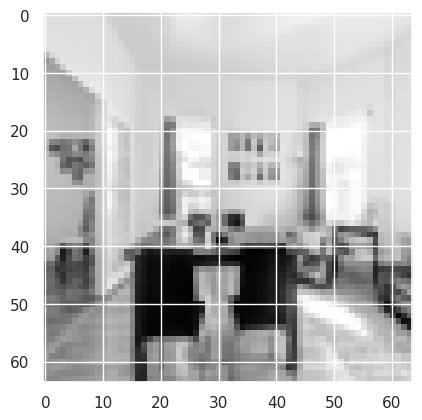

In [123]:
# check image loading
import matplotlib.pyplot as plt
plt.imshow(image_FS [0, :, :, 0], cmap='gray')

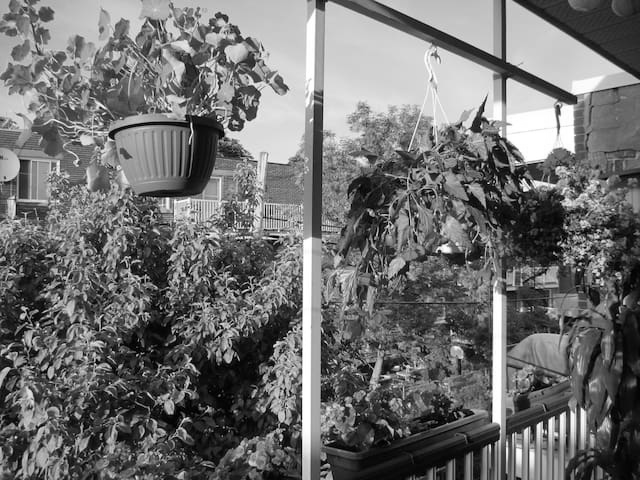

In [124]:
Image.open(
            'a4/img_train/933.jpg'
        ).convert('LA')

In [125]:
#checking total shape of training data
np.shape(image_FS)

(7326, 64, 64, 2)

**Split the data to training and validation**

In [126]:
from sklearn.model_selection import train_test_split
# split data (training/testing set)
train_data1, val_data1 = train_test_split(df_train1, test_size=0.2, random_state=10)

**preparing training data**

In [127]:
# loading summary with make sure all data of it is string 
x_train_text_1 = train_data1.summary.astype('str')
# loading images:
x_train_image_1 = np.array([load_image(i) for i in tqdm(train_data1.image)])


# get type
y_train_type_1= train_data1.type_codes

# get price
y_train_price_1 = train_data1.price

  0%|          | 0/5860 [00:00<?, ?it/s]

In [128]:
print("x_train_text_1.shape >>>> ",x_train_text_1.shape)
print("x_train_image_1.shape >>>> ",x_train_image_1.shape)
print("y_train_type_1.shape >>>> ",y_train_type_1.shape)
print("y_train_price_1.shape >>>> ",y_train_price_1.shape)

x_train_text_1.shape >>>>  (5860,)
x_train_image_1.shape >>>>  (5860, 64, 64, 2)
y_train_type_1.shape >>>>  (5860,)
y_train_price_1.shape >>>>  (5860,)


**preparing  validation data**

In [129]:
# loading summary with make sure all data of it is string 
x_val_text_1= val_data1.summary.astype('str')
# loading images:
x_val_image_1 = np.array([load_image(i) for i in tqdm(val_data1.image)])

# get type
y_val_type_1 = val_data1.type_codes

# get price
y_val_price_1 = val_data1.price

  0%|          | 0/1466 [00:00<?, ?it/s]

In [130]:
print("x_val_text_1.shape >>>> ",x_val_text_1.shape)
print("x_val_image_1.shape >>>> ",x_val_image_1.shape)
print("y_val_type_1.shape >>>> ",y_val_type_1.shape)
print("y_val_price_1.shape >>>> ",y_val_price_1.shape)

x_val_text_1.shape >>>>  (1466,)
x_val_image_1.shape >>>>  (1466, 64, 64, 2)
y_val_type_1.shape >>>>  (1466,)
y_val_price_1.shape >>>>  (1466,)


**preprocess text in training data**

In [131]:
#first tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pprint import pprint

vocab_size = 40000
max_len = 100

# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train_text_1)

In [132]:
# padding function
def _preprocess(list_of_text):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),
        maxlen=max_len,
        padding='post',
    )
     

In [133]:
x_train_summary_1=_preprocess(x_train_text_1)
print(x_train_summary_1.shape)
     

(5860, 100)


In [134]:
# we can use the tokenizer to convert IDs to words.
pprint(tokenizer.sequences_to_texts(x_train_summary_1[:5]))

['featured in the new york times the wall street journal and fast company '
 'we’ve hosted over 350k guests in 2 500 spaces with an average rating of 4 6 '
 'stars each space is designed and run by us so you’ll always know what to '
 'expect from your stay at sonder we’ve combined the best parts of home and '
 'hotel 24 7 support via text email or phone coffee fresh towels and bathroom '
 'essentials provided hotel standard cleaning before you arrive self check in',
 'our home is on the first floor of a charming duplex it has two large '
 'bedrooms a living room a washroom with a shower bathtub an open kitchen and '
 'dining room a beautiful spacious deck with a bbq and a backyard our home is '
 "perfect for young families it is close to numerous parks and has children's "
 'books toys and board games bath toys a sandbox in the backyard and a playpen '
 'travel crib our extensive board game collection is also perfect for game '
 'lovers of all ages',
 'my place is good for couples solo

In [135]:
x_train_summary_1

array([[ 648,    5,    1, ...,    0,    0,    0],
       [  83,  104,    7, ...,    0,    0,    0],
       [  82,   29,    7, ...,    0,    0,    0],
       ...,
       [ 121,  647,   68, ...,    0,    0,    0],
       [1557,  224,   95, ...,    0,    0,    0],
       [ 109,  383, 1257, ...,    0,    0,    0]], dtype=int32)

In [136]:
print('total words in the dictionary:', tokenizer.num_words)


total words in the dictionary: 40000


In [137]:
x_val_summary_1 = _preprocess(x_val_text_1)
print(x_val_summary_1.shape)

(1466, 100)


In [138]:
# we can use the tokenizer to convert IDs to words.
pprint(tokenizer.sequences_to_texts(x_val_summary_1[:5]))

['spacious studio located downtown right into the middle of the action near '
 'saint catherine street east and within walking distance to guy concordia '
 'metro station 2min restaurants bars etc walkable distance to chinatown old '
 'port suitable for 1 or 2 people double bed but possible to fit up to 4 '
 'people because of the sofa bed high speed wifi no cable tv but smart tv '
 'netflix youtube portable air conditioning ideal in summer building amenities '
 'include a gym and an indoor pool',
 'agréable appartement 4 1 2 environ 70m2 situé dans le quartier côte des '
 'neiges avenue saint kevin tout près de l’oratoire du mont saint joseph une '
 'chambre est disponible avec lit 2 places étagères et fenêtre le salon étant '
 'assez grand il peut accueillir 2 autres personnes sur un matelas gonflable '
 "que nous pouvons vous fournir le logement dispose d'un thermostat dans "
 'chaque pièce la machine a laver et le sèche linge sont communs et aux sous 2',
 'grand appt dans le villag

**test data preprocessing**

In [139]:
df_test_1=pd.read_csv('a4/test_x.csv')

In [140]:
#convert the test summary column to string
x_test_text_1 = df_test_1.summary.astype('str')
#apply preprocess function on summary
x_test_summary_1= _preprocess(x_test_text_1)
#apply the load_image method on test images 
x_test_image_1 = np.array([load_image(i) for i in tqdm(df_test_1.image)])

  0%|          | 0/7360 [00:00<?, ?it/s]

In [141]:
print("x_test_summary_1.shape >>>> ",x_test_summary_1.shape)
print("x_test_image_1.shape >>>> ",x_test_image_1.shape)

x_test_summary_1.shape >>>>  (7360, 100)
x_test_image_1.shape >>>>  (7360, 64, 64, 2)


**some functions to plot history**

In [142]:
def train_val_loss_plt_price(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,7))
  fig.suptitle('price model results')
  # first we display the training price accuracy in red color VS. the validation price accuracy in blue color through the epochs
  ax1.plot(history.history['price_sparse_categorical_accuracy'], 'b')
  ax1.plot(history.history['val_price_sparse_categorical_accuracy'], 'r')
  ax1.set_title('price accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epochs')
  ax1.legend(['tr_price_acc', 'val_price_acc'])
  ax1.grid()
  # on this axis, we plot the price training loss in red color VS. the price validation loss in blue color through the epochs
  ax2.plot(history.history['price_loss'], 'b')
  ax2.plot(history.history['val_price_loss'], 'r')
  ax2.set_title('price loss')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['tr_price_loss', 'val_price_loss'])
  ax2.grid()
  plt.show()

In [143]:
def train_val_loss_plt_type(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,7))
  fig.suptitle('type model results')
  # first we display the training price accuracy in red color VS. the validation price accuracy in blue color through the epochs
  ax1.plot(history.history['type_sparse_categorical_accuracy'], 'b')
  ax1.plot(history.history['val_type_sparse_categorical_accuracy'], 'r')
  ax1.set_title('type accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epochs')
  ax1.legend(['tr_type_acc', 'val_type_acc'])
  ax1.grid()
  # on this axis, we plot the price training loss in red color VS. the price validation loss in blue color through the epochs
  ax2.plot(history.history['type_loss'], 'b')
  ax2.plot(history.history['val_type_loss'], 'r')
  ax2.set_title('type loss')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['tr_type_loss', 'val_type_loss'])
  ax2.grid()
  plt.show()
     

In [144]:
def train_val_loss_plt_model(history):

  fig, (ax1) = plt.subplots(1, 1, figsize=(25,7))
  fig.suptitle('model results')
  ax1.plot(history.history['loss'], 'b')
  ax1.plot(history.history['val_loss'], 'r')
  ax1.set_title('model loss')
  ax1.set_ylabel('loss')
  ax1.set_xlabel('epoch')
  ax1.legend(['train_model_loss', 'val_model_loss'])
  ax1.grid()
  plt.show()

In [145]:
len_price = len(df_train1.price.unique())
len_price

3

In [146]:
len_type = len(df_train1.type.unique())
len_type

24

**Trail 1**



**the first trial i will use  in my model   average of embedding for text**




And for  image part i will use simple conv2d



i will use adam optimizer for compiling the model and  sparse_categorical_crossentropy as a loss for my model and sparse_categorical_accuracy for  evaluating my model






In [147]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPool2D,SpatialDropout1D,SimpleRNN
from tensorflow.keras.optimizers import Adam

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))
# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)
# image part 
cov = Conv2D(32, (16, 16))(in_image)
pl = MaxPool2D((16, 16))(cov)
flattened = Flatten()(pl)

# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)

# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   16416       ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     4000000     ['input_1[0][0]']                
                                                                                              

In [ ]:

history = model.fit(
     x={
        'summary': x_train_summary_1,
        'image': x_train_image_1
    },
    y={
        'type': y_train_type_1,
        'price': y_train_price_1,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5,restore_best_weights=True )
    ],
    verbose=1
)

Epoch 1/15
293/293 [==============================] - 43s 109ms/step - loss: 1.0791 - price_loss: 0.8504 - type_loss: 1.3077 - price_sparse_categorical_accuracy: 0.6190 - type_sparse_categorical_accuracy: 0.7457 - val_loss: 0.9009 - val_price_loss: 0.8280 - val_type_loss: 0.9738 - val_price_sparse_categorical_accuracy: 0.6152 - val_type_sparse_categorical_accuracy: 0.7645
Epoch 2/15
293/293 [==============================] - 13s 44ms/step - loss: 0.8924 - price_loss: 0.8029 - type_loss: 0.9819 - price_sparse_categorical_accuracy: 0.6288 - type_sparse_categorical_accuracy: 0.7543 - val_loss: 0.8831 - val_price_loss: 0.8100 - val_type_loss: 0.9561 - val_price_sparse_categorical_accuracy: 0.6229 - val_type_sparse_categorical_accuracy: 0.7645
Epoch 3/15
293/293 [==============================] - 6s 20ms/step - loss: 0.8511 - price_loss: 0.7569 - type_loss: 0.9454 - price_sparse_categorical_accuracy: 0.6591 - type_sparse_categorical_accuracy: 0.7543 - val_loss: 0.8556 - val_price_loss: 0.78

In [ ]:
history_FS_T1=history


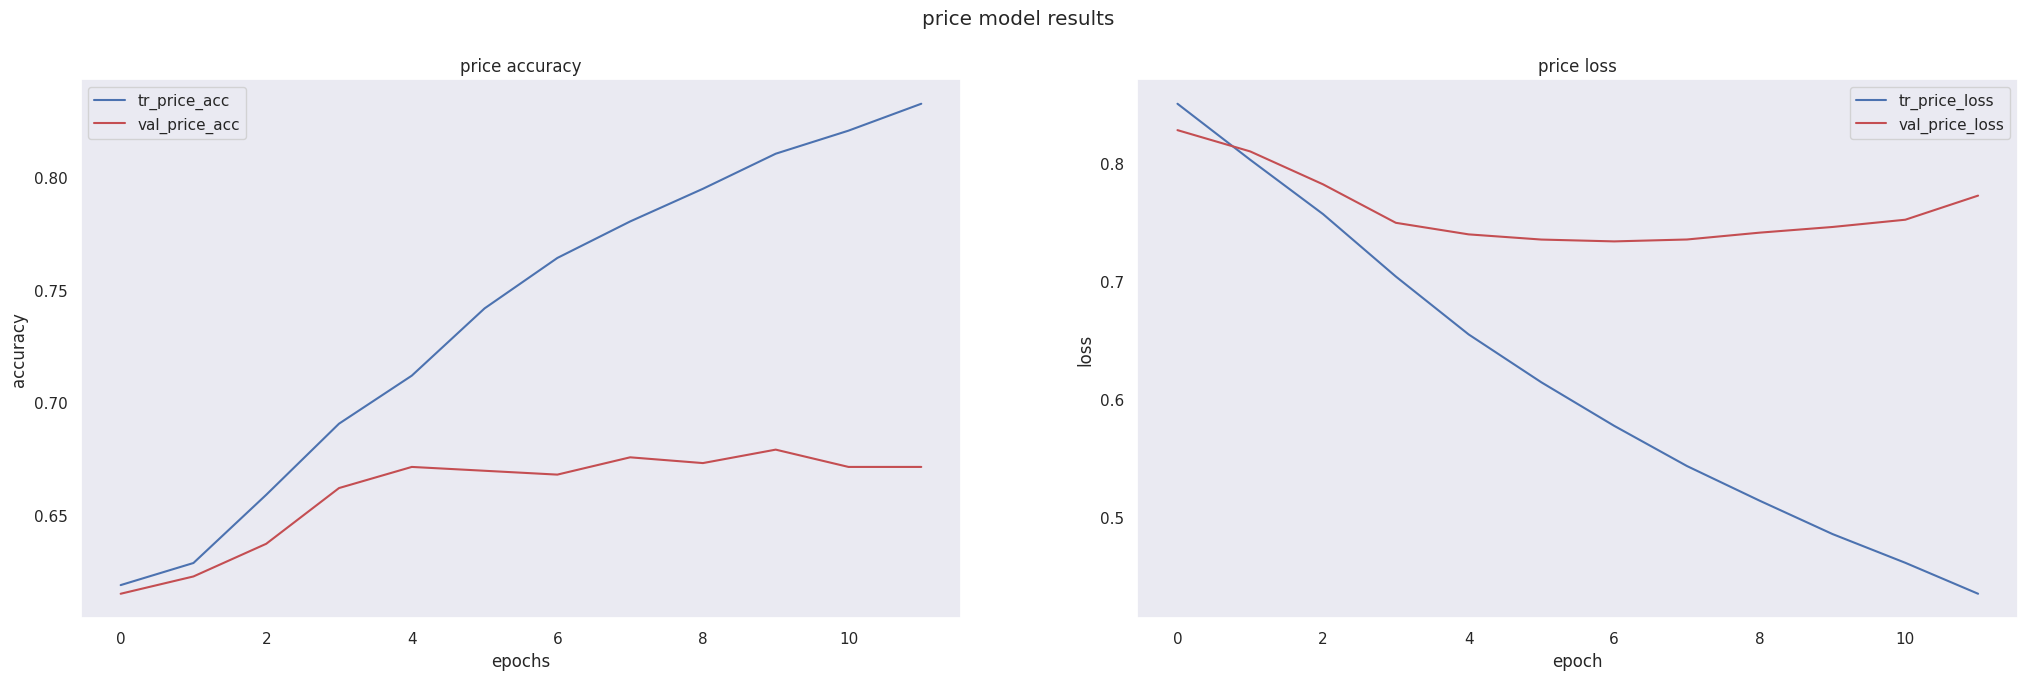

In [ ]:
train_val_loss_plt_price(history_FS_T1)


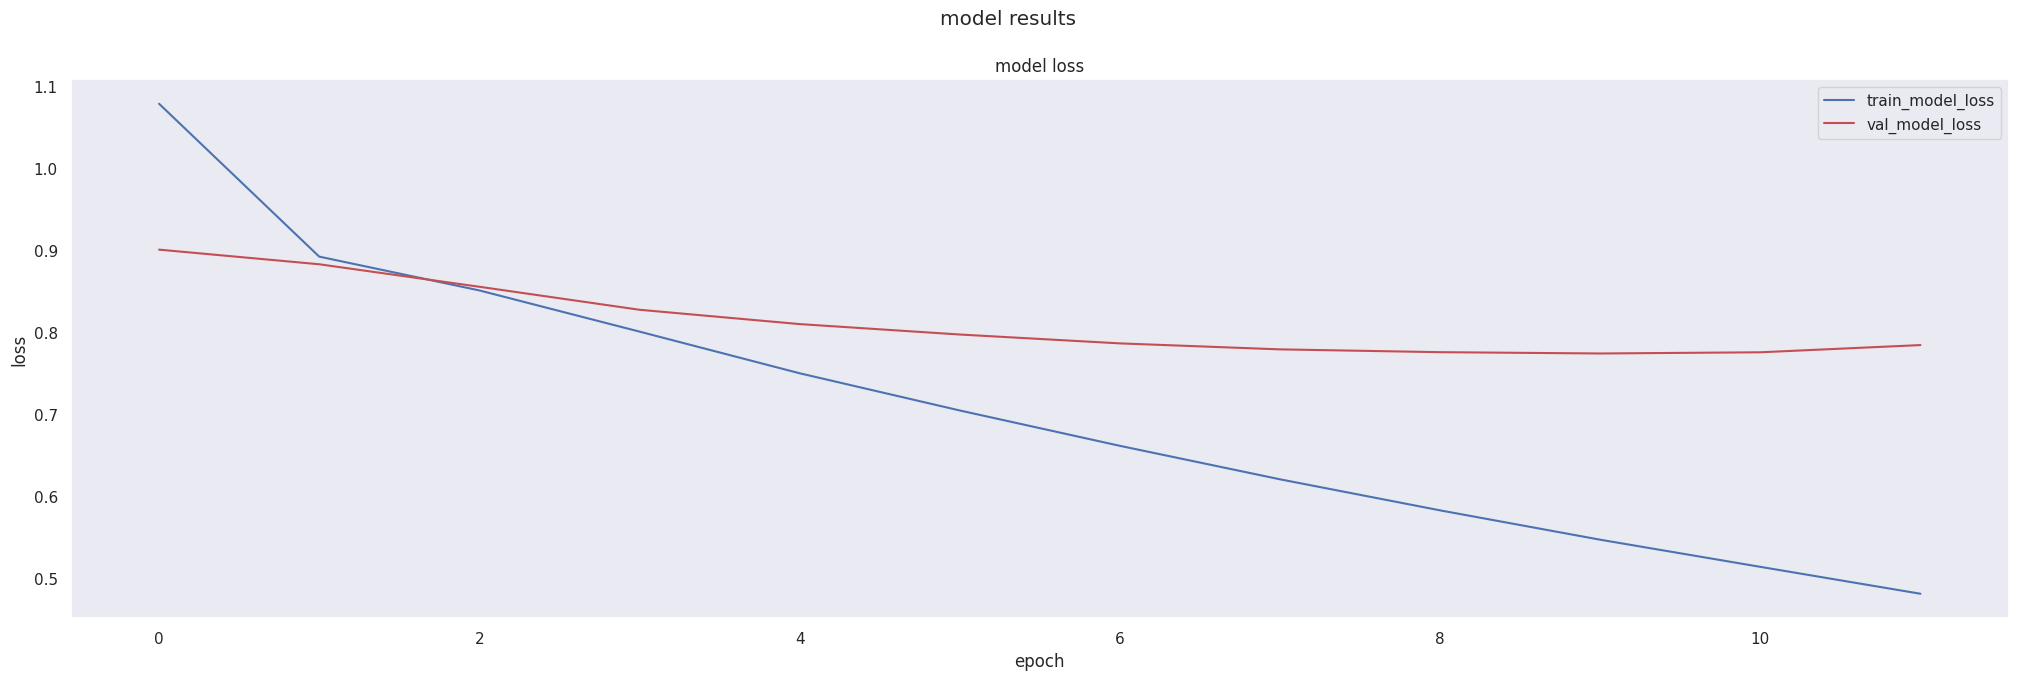

In [ ]:
train_val_loss_plt_model(history_FS_T1)


In [ ]:
res_eva=model.evaluate(x= {
     'summary': x_val_summary_1,
        'image': x_val_image_1},
  y= {'price': y_val_price_1,
    'type':y_val_type_1})
print("test loss, test acc:", res_eva)

46/46 [==============================] - 0s 5ms/step - loss: 0.7791 - price_loss: 0.7159 - type_loss: 0.8422 - price_sparse_categorical_accuracy: 0.6746 - type_sparse_categorical_accuracy: 0.7742
test loss, test acc: [0.7790518403053284, 0.7158847451210022, 0.8422190546989441, 0.6746248006820679, 0.774215579032898]


In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_1,
        'image': x_test_image_1
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 1s 2ms/step
[[0.747185   0.20338108 0.04943391]
 [0.93919986 0.05080362 0.00999658]
 [0.8486045  0.11320506 0.03819052]
 ...
 [0.79459226 0.17188436 0.0335234 ]
 [0.92294496 0.05739066 0.01966442]
 [0.71488357 0.24077986 0.04433659]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_1.id,
     'price': price_category_predicted}
).to_csv('sample_submission_T1.csv', index=False)

**it give me a public score in kaggle 0.67608**


let us see the other models will give me accuracy better or lower than this accuracy

**Trial two**

in this trial for text part i will use embeded and Bidirectional RNN (LSTM) for text part

and for image part i use conv2D and MaxPool2D









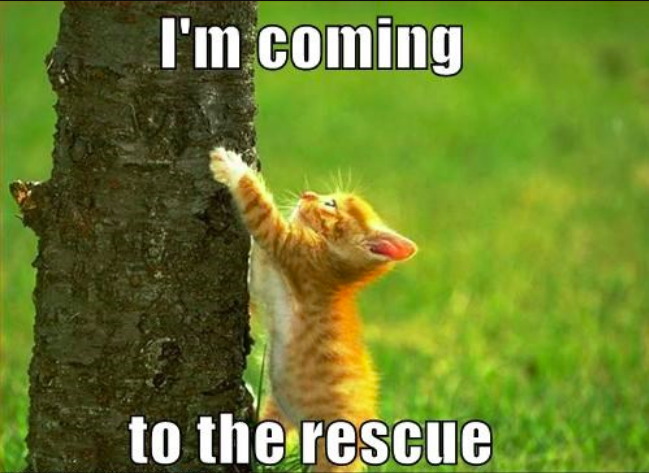




In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# Bidirectional Layer:
# Bidirectional LSTMs are an extension of traditional LSTMs that can improve model
# performance on sequence classification problems.
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
bidirectional1 = keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences=True))(embedded)
bidirectional2 = keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences=True))(bidirectional1)
bidirectional3 = keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences=False))(bidirectional2)

# image part 
cov = Conv2D(32, (3, 3))(in_image) 
pl = MaxPool2D((3, 3))(cov) 
cov2 = Conv2D(32, (2,2))(pl) 
pl2 = MaxPool2D((2,2))(cov2)
flattened = Flatten()(pl2) # flatten the shape 

# fusion - combinig both
fused = tf.concat([bidirectional3, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()
     

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 62, 62, 32)   608         ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     4000000     ['input_1[0][0]']                
                                                                                              

In [ ]:
history = model.fit(
     x={
        'summary': x_train_summary_1,
        'image': x_train_image_1
    },
    y={
        'type': y_train_type_1,
        'price': y_train_price_1,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=3,restore_best_weights=True )
    ],
    verbose=1
)

Epoch 1/15
293/293 [==============================] - 65s 156ms/step - loss: 0.9652 - price_loss: 0.8495 - type_loss: 1.0810 - price_sparse_categorical_accuracy: 0.6207 - type_sparse_categorical_accuracy: 0.7528 - val_loss: 0.9191 - val_price_loss: 0.8489 - val_type_loss: 0.9893 - val_price_sparse_categorical_accuracy: 0.6152 - val_type_sparse_categorical_accuracy: 0.7645
Epoch 2/15
293/293 [==============================] - 19s 64ms/step - loss: 0.9248 - price_loss: 0.8355 - type_loss: 1.0141 - price_sparse_categorical_accuracy: 0.6254 - type_sparse_categorical_accuracy: 0.7543 - val_loss: 0.9685 - val_price_loss: 0.8644 - val_type_loss: 1.0725 - val_price_sparse_categorical_accuracy: 0.6297 - val_type_sparse_categorical_accuracy: 0.7577
Epoch 3/15
293/293 [==============================] - 14s 49ms/step - loss: 0.9114 - price_loss: 0.8363 - type_loss: 0.9865 - price_sparse_categorical_accuracy: 0.6216 - type_sparse_categorical_accuracy: 0.7541 - val_loss: 0.9132 - val_price_loss: 0.8

In [ ]:
history_SS_T5=history


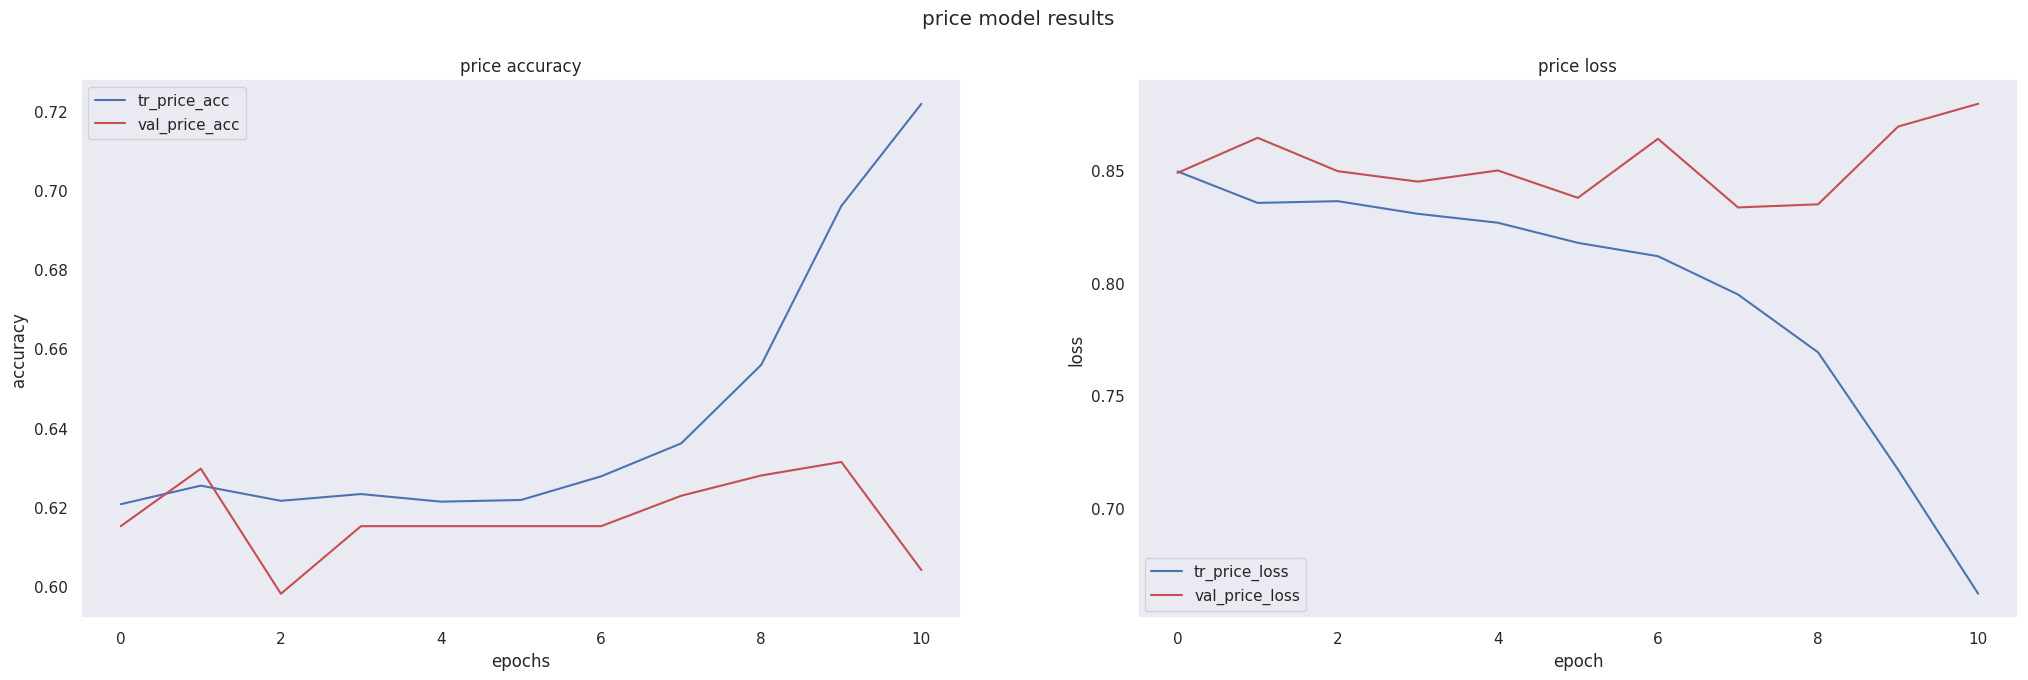

In [ ]:
train_val_loss_plt_price(history_SS_T5)


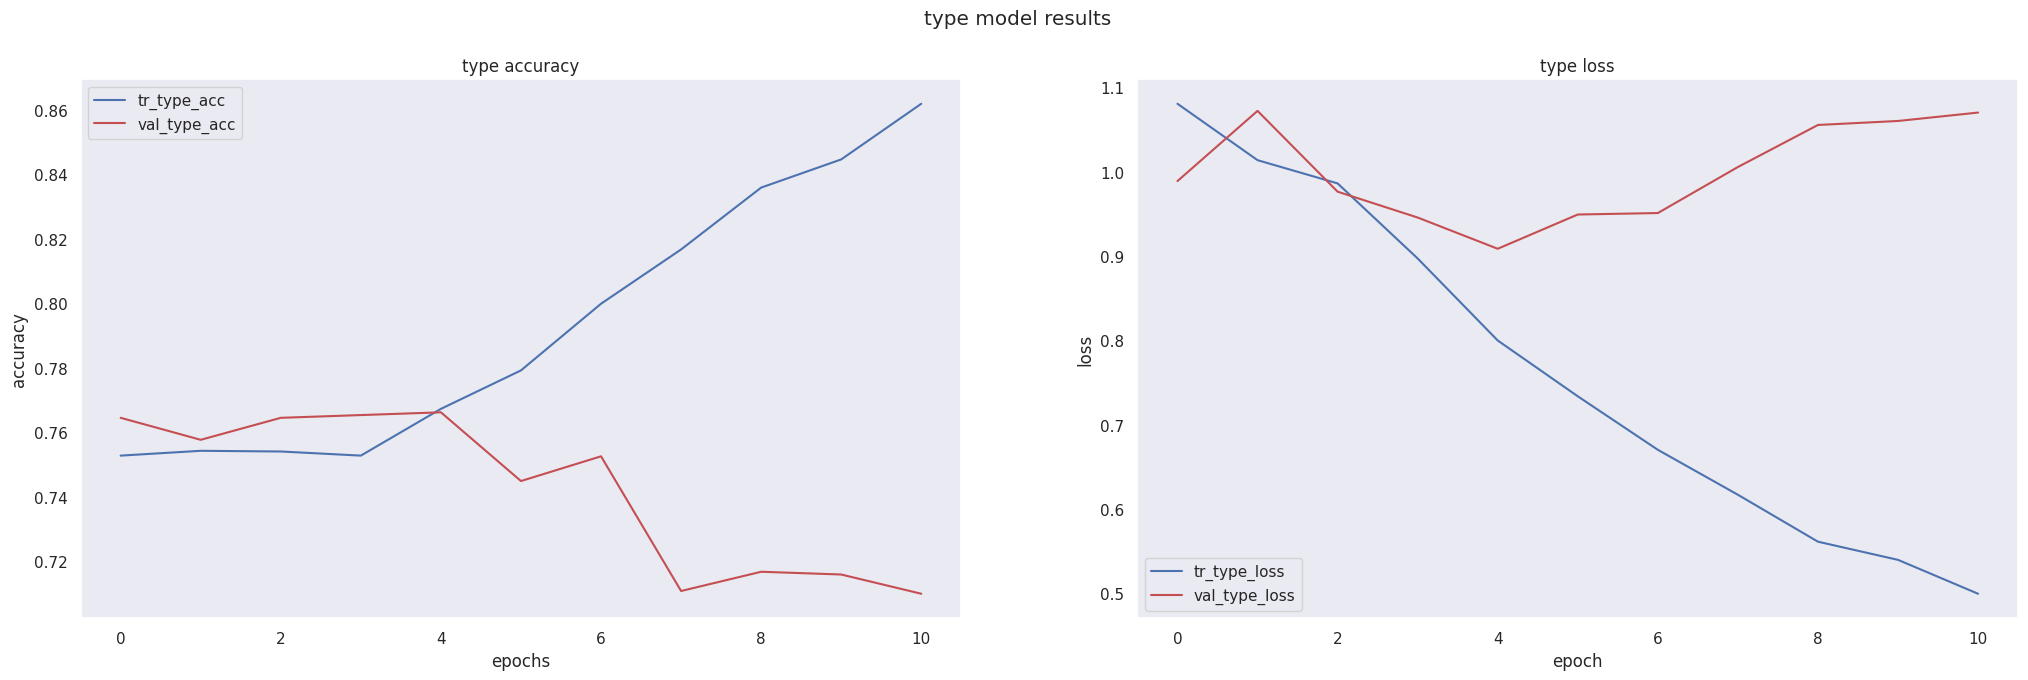

In [ ]:
train_val_loss_plt_type(history_SS_T5)


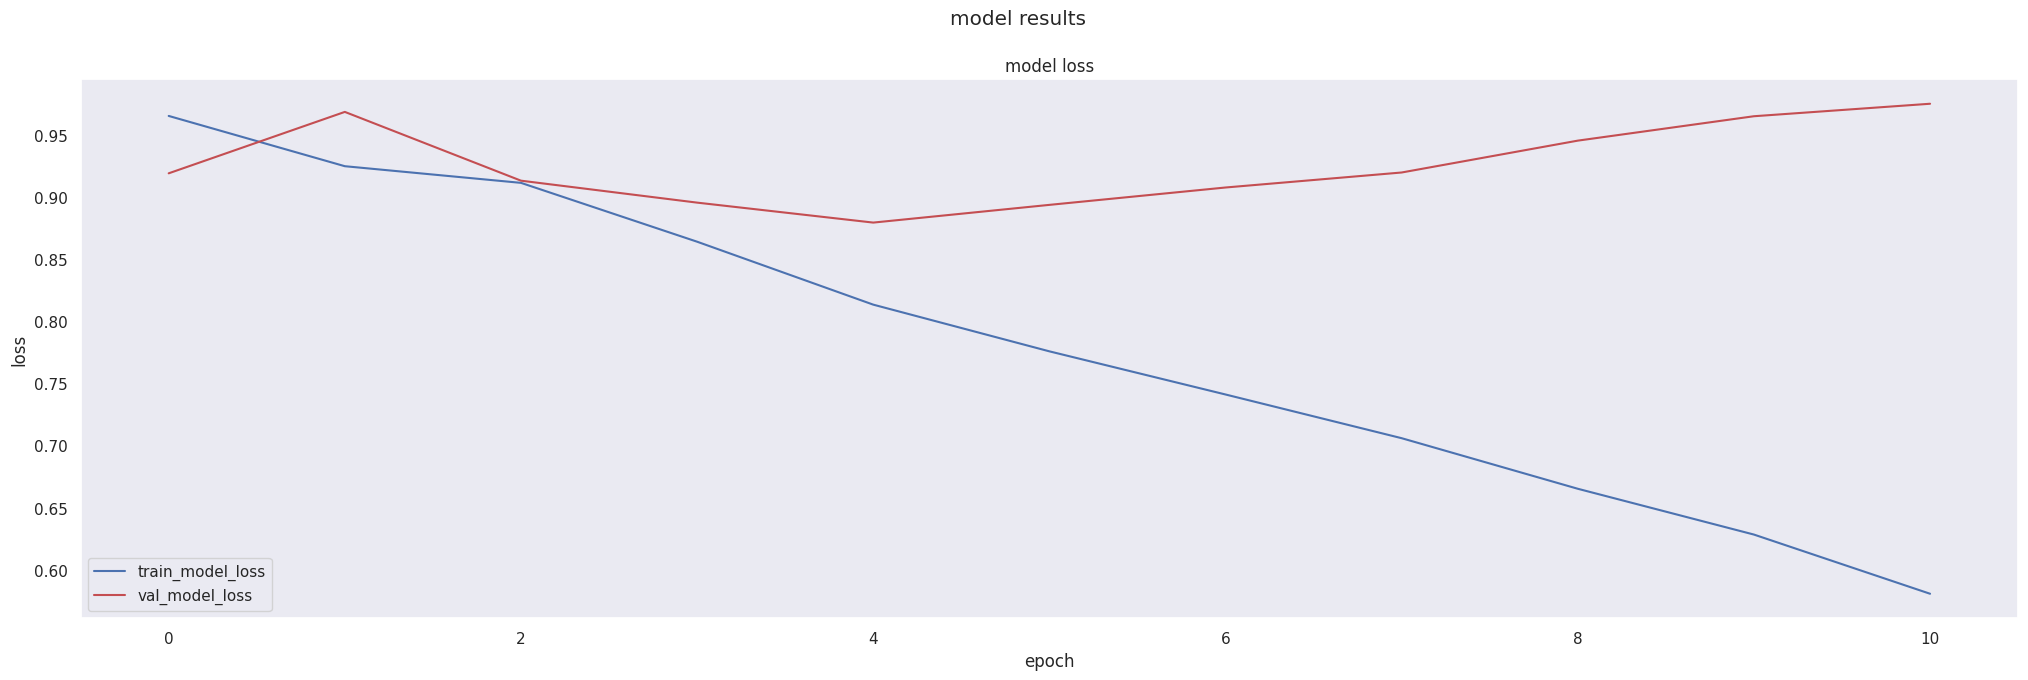

In [ ]:
train_val_loss_plt_model(history_SS_T5)

In [ ]:
res_eva=model.evaluate(x= {
     'summary': x_val_summary_1,
        'image': x_val_image_1},
  y= {'price': y_val_price_1,
    'type':y_val_type_1})
print("test loss, test acc:", res_eva)

46/46 [==============================] - 1s 20ms/step - loss: 0.9399 - price_loss: 0.8505 - type_loss: 1.0293 - price_sparse_categorical_accuracy: 0.6085 - type_sparse_categorical_accuracy: 0.7196
test loss, test acc: [0.9398983716964722, 0.8505196571350098, 1.0292768478393555, 0.608458399772644, 0.7196453213691711]


In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_1,
        'image': x_test_image_1
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 5s 11ms/step
[[0.554266   0.31388557 0.13184848]
 [0.7182883  0.21189784 0.06981385]
 [0.5598777  0.29441357 0.14570868]
 ...
 [0.60972345 0.27656743 0.11370909]
 [0.5642936  0.26991028 0.16579612]
 [0.6246831  0.27572346 0.09959349]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_1.id,
     'price': price_category_predicted}
).to_csv('sample_submission_T2.csv', index=False)

**it give me a public score in kaggle 0.61603**
**bad accuracy**


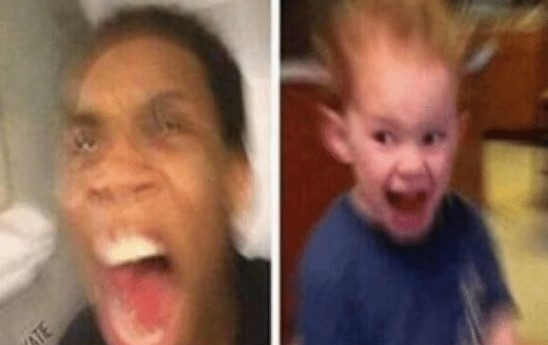


























it seems so bad  test score v for my multimodel 

let us see the other models will give me accuracy better or lower than this bad accuracy


**Trail3** 


**in this trial i will use vgg16 transfer  learning model and this i use for image part.**


**and for text part i use embeded layer and  two layers attention anD BIdirctional GRU.**

let us train the model and see the accuracy





In [ ]:
x_tr_image=x_train_image_1
x_vl_image=x_val_image_1


(5860, 64, 64, 3)
(1466, 64, 64, 3)


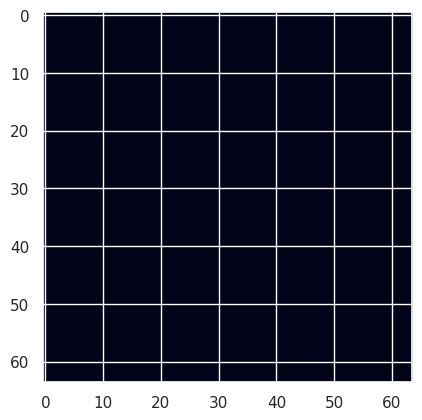

In [ ]:
from keras.applications.vgg16 import VGG16

# VGG needs input images with 3 channels, so I'll extend the training data to have 3 channels and appear RGB
# x_tr_image is currently (6101, 64, 64, 2)
rgb_tr = x_tr_image[:,:,:,0]
rgb_vl = x_vl_image[:,:,:,0]
# rgb.shape # now it's (6101, 64, 64)
plt.imshow(rgb_tr[0, :, :]) # looks the same as it did before
rgb_tr = np.repeat(rgb_tr[..., np.newaxis], 3, -1) # repeat the same values across 3 channels
rgb_vl = np.repeat(rgb_vl[..., np.newaxis], 3, -1) # repeat the same values across 3 channels
print(rgb_tr.shape) # now we have 487 samples of (6101, 64, 64, 3)
print(rgb_vl.shape) # now we have 487 samples of (1526, 64, 64, 3)

In [ ]:
base = VGG16(include_top=False, input_shape=(64,64,3)) 
base.trainable = False # freezing the weights

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 3)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
# averaged = tf.reduce_mean(embedded, axis=1) # compute the mean of the embeddings to reduce the rank of the embedding
attention = keras.layers.MultiHeadAttention(num_heads=2, key_dim=2)(embedded, embedded)
bi_lstm =  keras.layers.Bidirectional(keras.layers.GRU(50, recurrent_regularizer='l2'))(attention) # adding quadratic regularizer

# image part
scaling = keras.layers.Rescaling(1./127.5, offset=-1)(in_image) # rescaling to [-1,1] for VGG16
vgg = base(scaling, training=False) # pass the base model the scaled inputs
pl = keras.layers.GlobalAveragePooling2D()(vgg) # global average pooling, pretty much the same as flattening
do = Dropout(0.2)(pl) # dropout at a rate of 20%
fl = Flatten()(do) # flattening anyways


# fusion:
fused = tf.concat([bi_lstm, fl], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

# model definition
bi_vgg_model = keras.Model(
      inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
        'type': p_type,
    },
)

bi_vgg_model.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
        'type': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'price': 0.5,
        'type': 0.5,       
    },
    metrics={
        'price': ['SparseCategoricalAccuracy'],
        'type': ['SparseCategoricalAccuracy'],
    },
)

bi_vgg_model.summary()
     

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 64, 64, 3)    0           ['input_5[0][0]']                
                                                                                                  
 input_4 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 vgg16 (Functional)             (None, 2, 2, 512)    14714688    ['rescaling[0][0]']              
                                                                                            

In [ ]:
history = bi_vgg_model.fit(
    x={
        'summary': x_train_summary_1,
        'image': rgb_tr
    },
    y={
        'type': y_train_type_1,
        'price': y_train_price_1,
    },
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=20,restore_best_weights=True )
    ],
    verbose=1
)
  

Epoch 1/30
293/293 [==============================] - 7s 25ms/step - loss: 0.5747 - price_loss: 0.5083 - type_loss: 0.6376 - price_sparse_categorical_accuracy: 0.7835 - type_sparse_categorical_accuracy: 0.8146 - val_loss: 0.9347 - val_price_loss: 0.8739 - val_type_loss: 0.9930 - val_price_sparse_categorical_accuracy: 0.6527 - val_type_sparse_categorical_accuracy: 0.7560
Epoch 2/30
293/293 [==============================] - 6s 21ms/step - loss: 0.5384 - price_loss: 0.4689 - type_loss: 0.6045 - price_sparse_categorical_accuracy: 0.8044 - type_sparse_categorical_accuracy: 0.8212 - val_loss: 0.9628 - val_price_loss: 0.9076 - val_type_loss: 1.0157 - val_price_sparse_categorical_accuracy: 0.6348 - val_type_sparse_categorical_accuracy: 0.7654
Epoch 3/30
293/293 [==============================] - 8s 27ms/step - loss: 0.5049 - price_loss: 0.4410 - type_loss: 0.5655 - price_sparse_categorical_accuracy: 0.8210 - type_sparse_categorical_accuracy: 0.8319 - val_loss: 0.9920 - val_price_loss: 0.9208 

In [ ]:
history_SS_T3=history


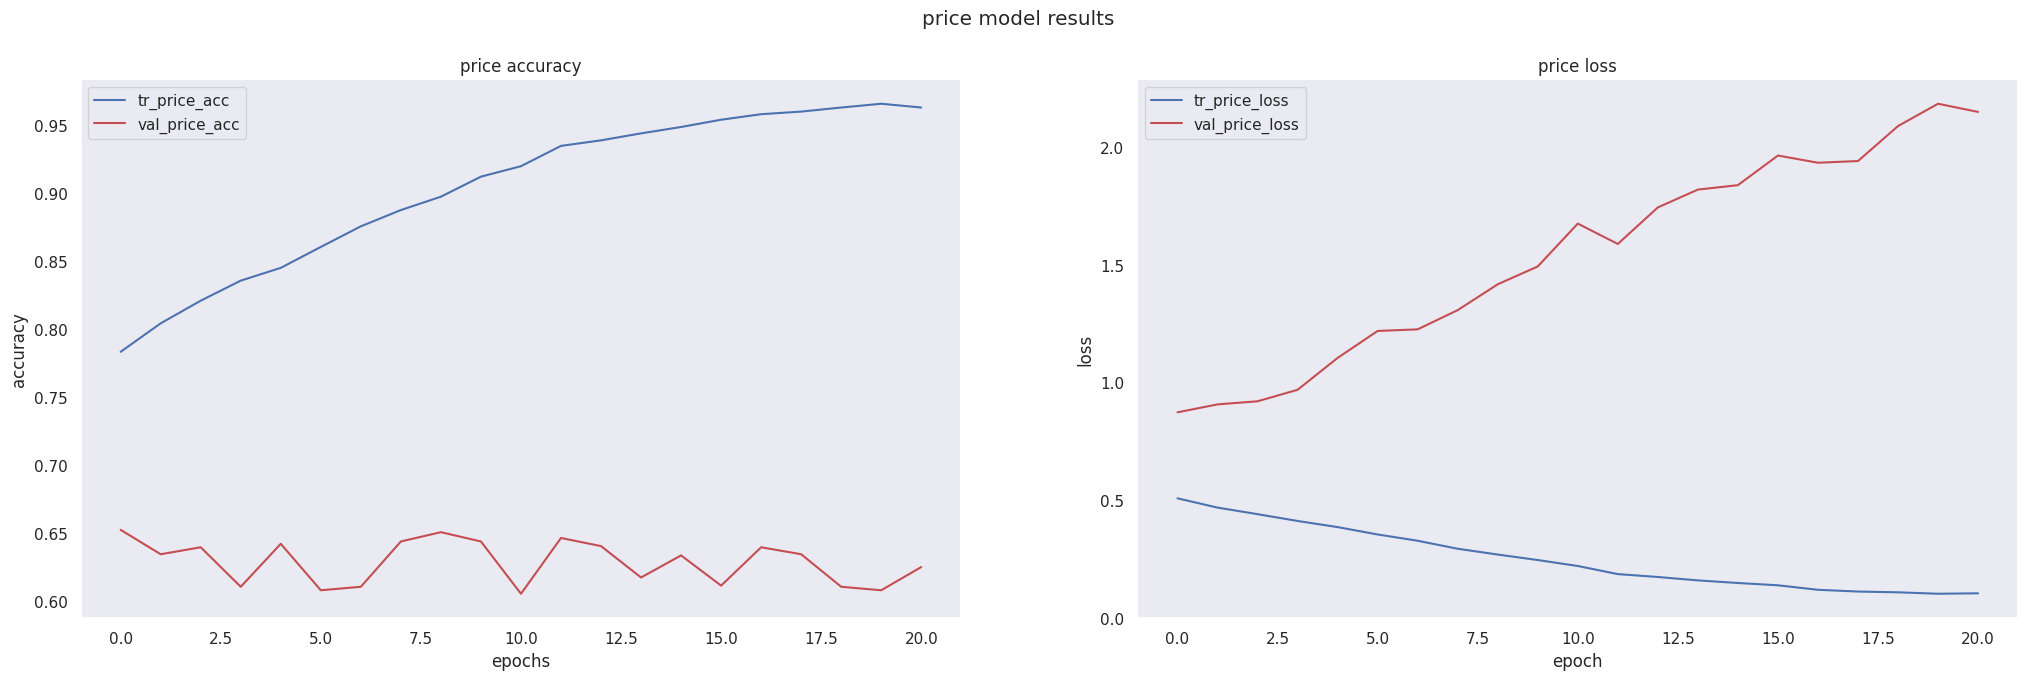

In [ ]:
train_val_loss_plt_price(history_SS_T3)


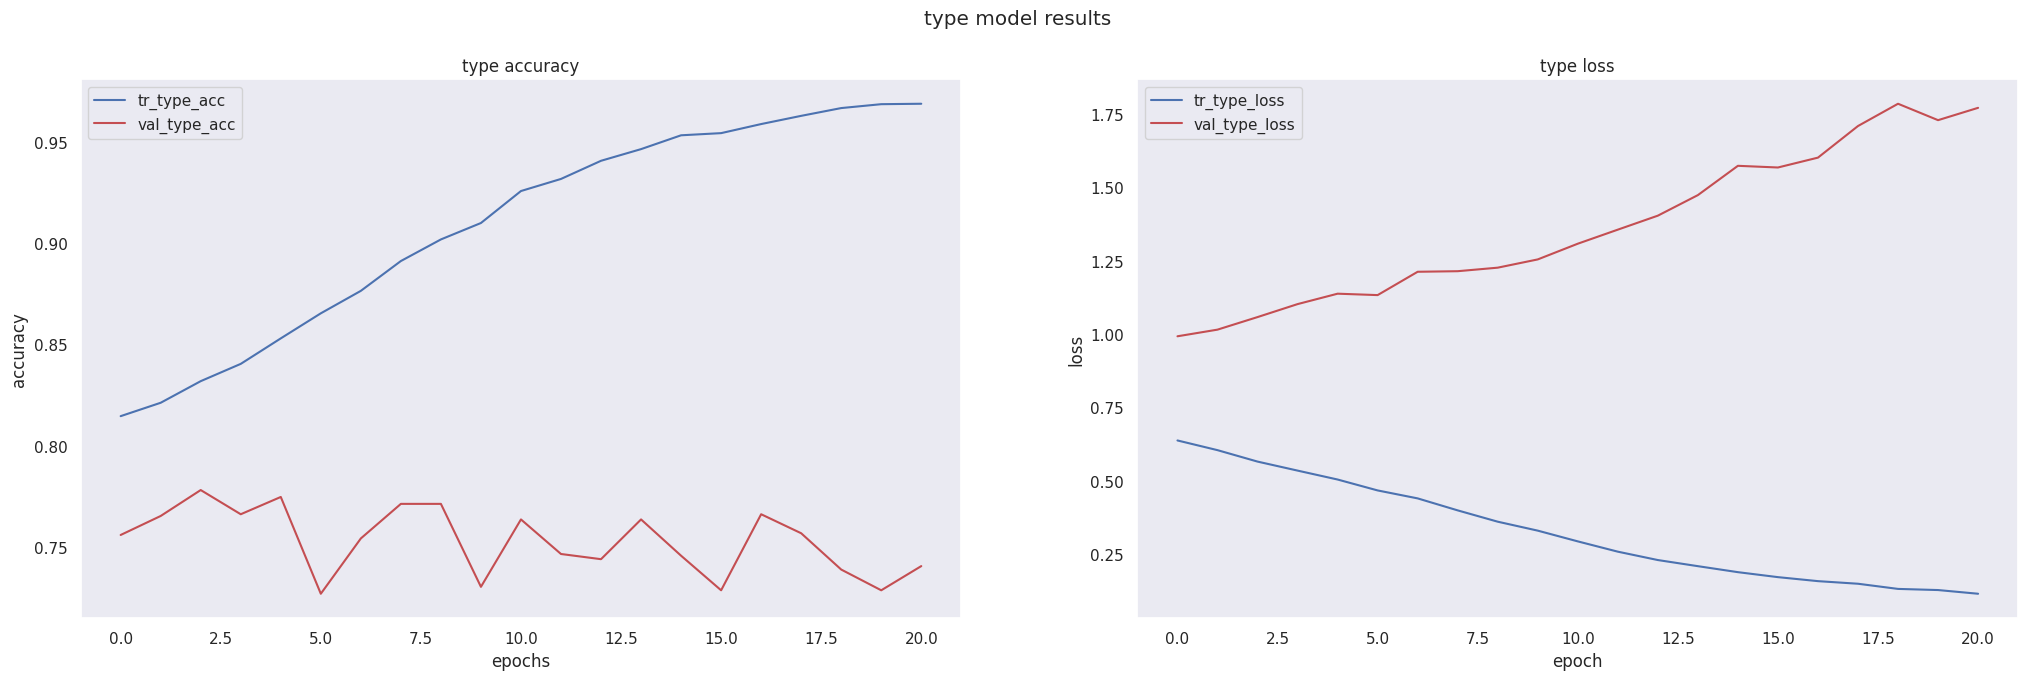

In [ ]:
train_val_loss_plt_type(history_SS_T3)


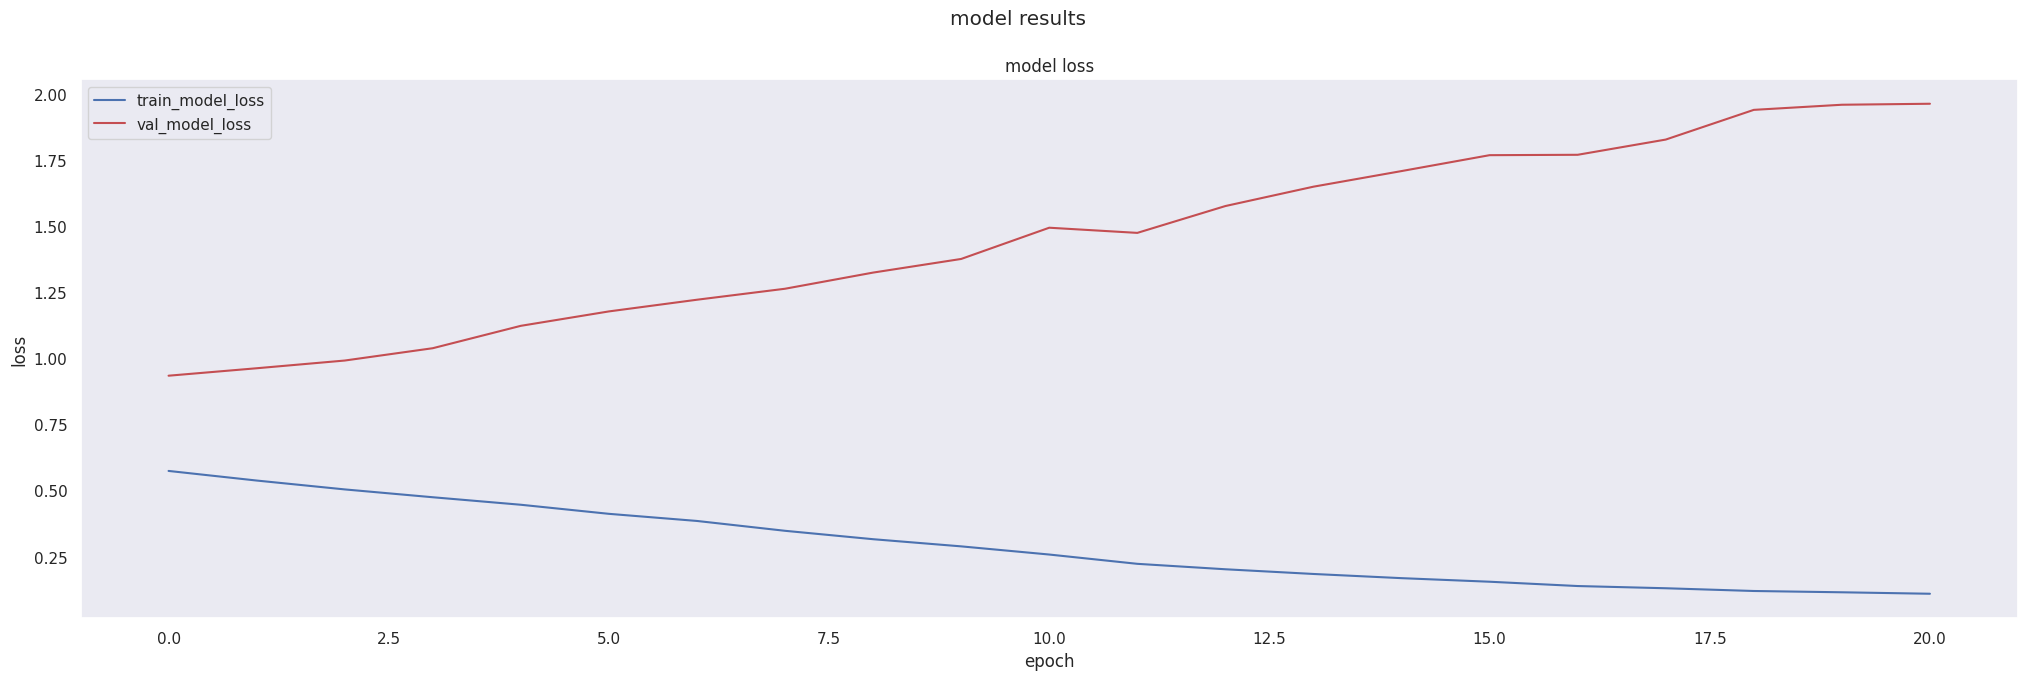

In [ ]:
train_val_loss_plt_model(history_SS_T3)


In [ ]:
y_val_type_1.unique()


array([ 1, 10,  5, 17, 13, 15, 22, 18, 20, 14,  2,  3,  0,  9, 12,  4,  7,
        8, 19,  6, 23], dtype=int8)

In [ ]:
y_train_type_1.unique()


array([ 1, 17, 18, 16, 10,  5, 22, 20, 11,  3, 14,  4,  2, 21, 15, 13,  0,
       23, 19,  6,  7], dtype=int8)

In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_1,
        'image': x_test_image_1
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 3s 12ms/step
[[0.554266   0.31388557 0.13184848]
 [0.7182883  0.21189784 0.06981385]
 [0.5598777  0.29441357 0.14570868]
 ...
 [0.60972345 0.27656743 0.11370909]
 [0.5642936  0.26991028 0.16579612]
 [0.6246831  0.27572346 0.09959349]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_1.id,
     'price': price_category_predicted}
).to_csv('sample_submission_T3.csv', index=False)

**it give me a public score in kaggle 0.61603**

**bad accuracy**

it is the same accuracy as the model in trial two i get shocked 

**Trail4**

in this trial i use embeded and drop out  and Bidirectional(LSTM) layers sequentially for text part.

and for image part i use conv2D and drop out layer and Maxbooling2D layer.





In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. 
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text)
dropout= Dropout(.4)(embedded)
bi_directional =  Bidirectional(LSTM(5))(dropout)

# image part 
# simple conv2d.
cov1 = Conv2D(10, (16, 16) , activation='relu')(in_image) # 10 number of filters and  (15, 15) size of filter
dropout = Dropout(.4)(cov1)
pl = MaxPool2D((16, 16))(dropout)
flattened = Flatten()(pl)

# fusion - combinig both
fused = tf.concat([bi_directional, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    }
)


# compile model with optimizer, loss values for each task, 
# loss weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 10)   5130        ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 100, 300)     12000000    ['input_1[0][0]']                
                                                                                              

In [ ]:
history = model.fit(
   x={
        'summary': x_train_summary_1,
        'image': x_train_image_1
    },
    y={
        'type': y_train_type_1,
        'price': y_train_price_1,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5)
    ],
    verbose=1,
    # class_weight = class_weight
)

Epoch 1/15
305/305 [==============================] - 58s 141ms/step - loss: 1.1914 - price_loss: 0.8925 - type_loss: 1.4903 - price_sparse_categorical_accuracy: 0.6191 - type_sparse_categorical_accuracy: 0.7514 - val_loss: 0.9182 - val_price_loss: 0.7885 - val_type_loss: 1.0479 - val_price_sparse_categorical_accuracy: 0.6437 - val_type_sparse_categorical_accuracy: 0.7477
Epoch 2/15
305/305 [==============================] - 13s 41ms/step - loss: 0.9072 - price_loss: 0.8340 - type_loss: 0.9804 - price_sparse_categorical_accuracy: 0.6203 - type_sparse_categorical_accuracy: 0.7574 - val_loss: 0.8697 - val_price_loss: 0.7699 - val_type_loss: 0.9696 - val_price_sparse_categorical_accuracy: 0.6437 - val_type_sparse_categorical_accuracy: 0.7477
Epoch 3/15
305/305 [==============================] - 9s 30ms/step - loss: 0.8317 - price_loss: 0.8031 - type_loss: 0.8604 - price_sparse_categorical_accuracy: 0.6225 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.8379 - val_price_loss: 0.74

In [ ]:
history_SS_T4=history


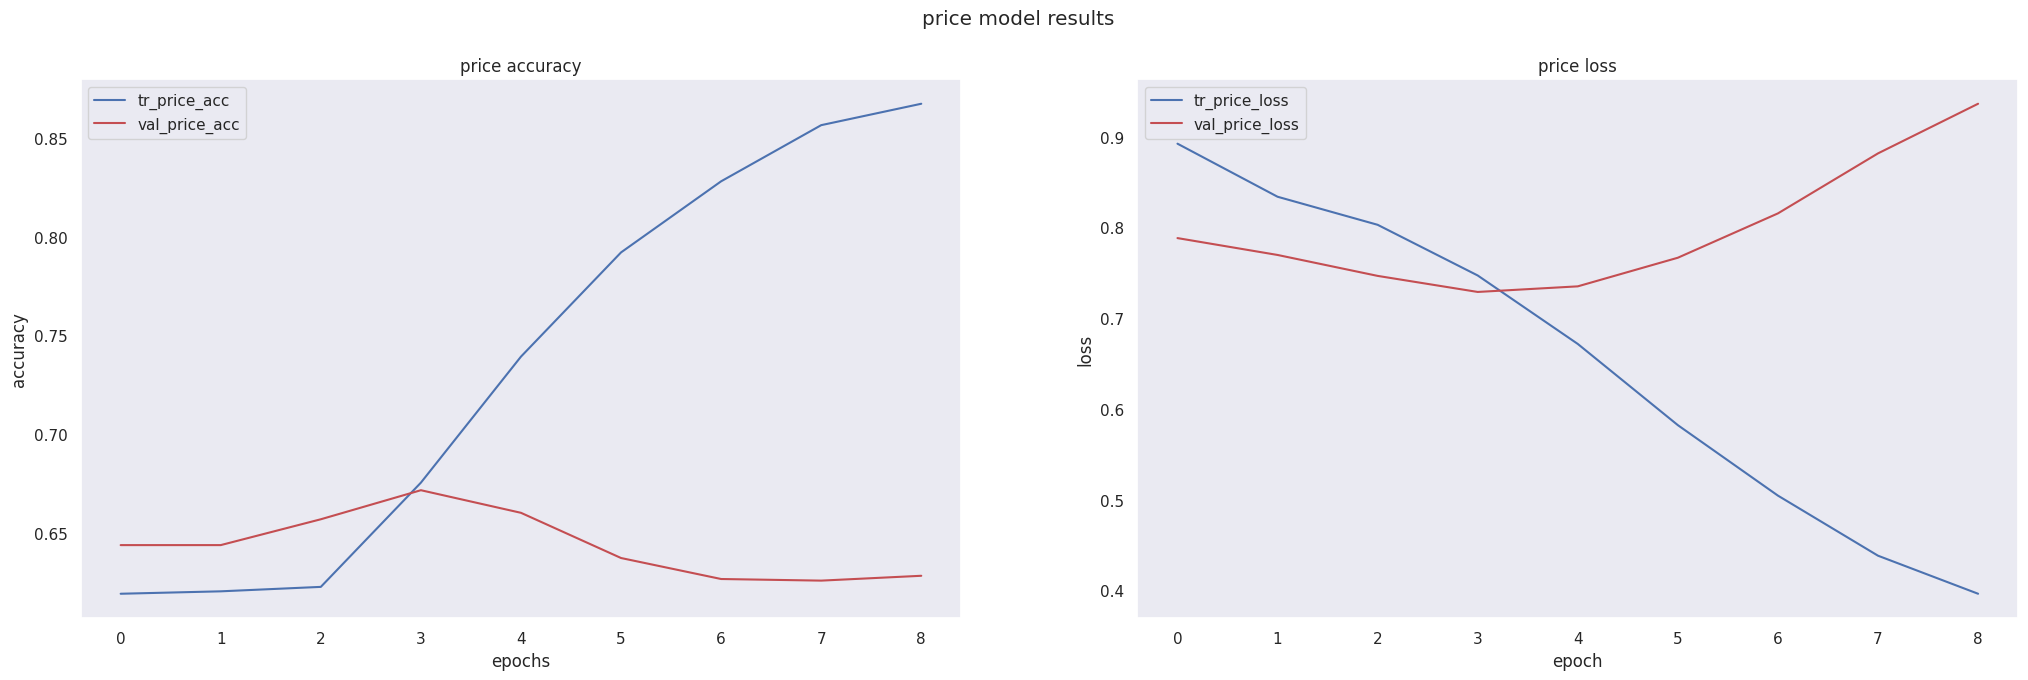

In [ ]:
train_val_loss_plt_price(history_SS_T4)


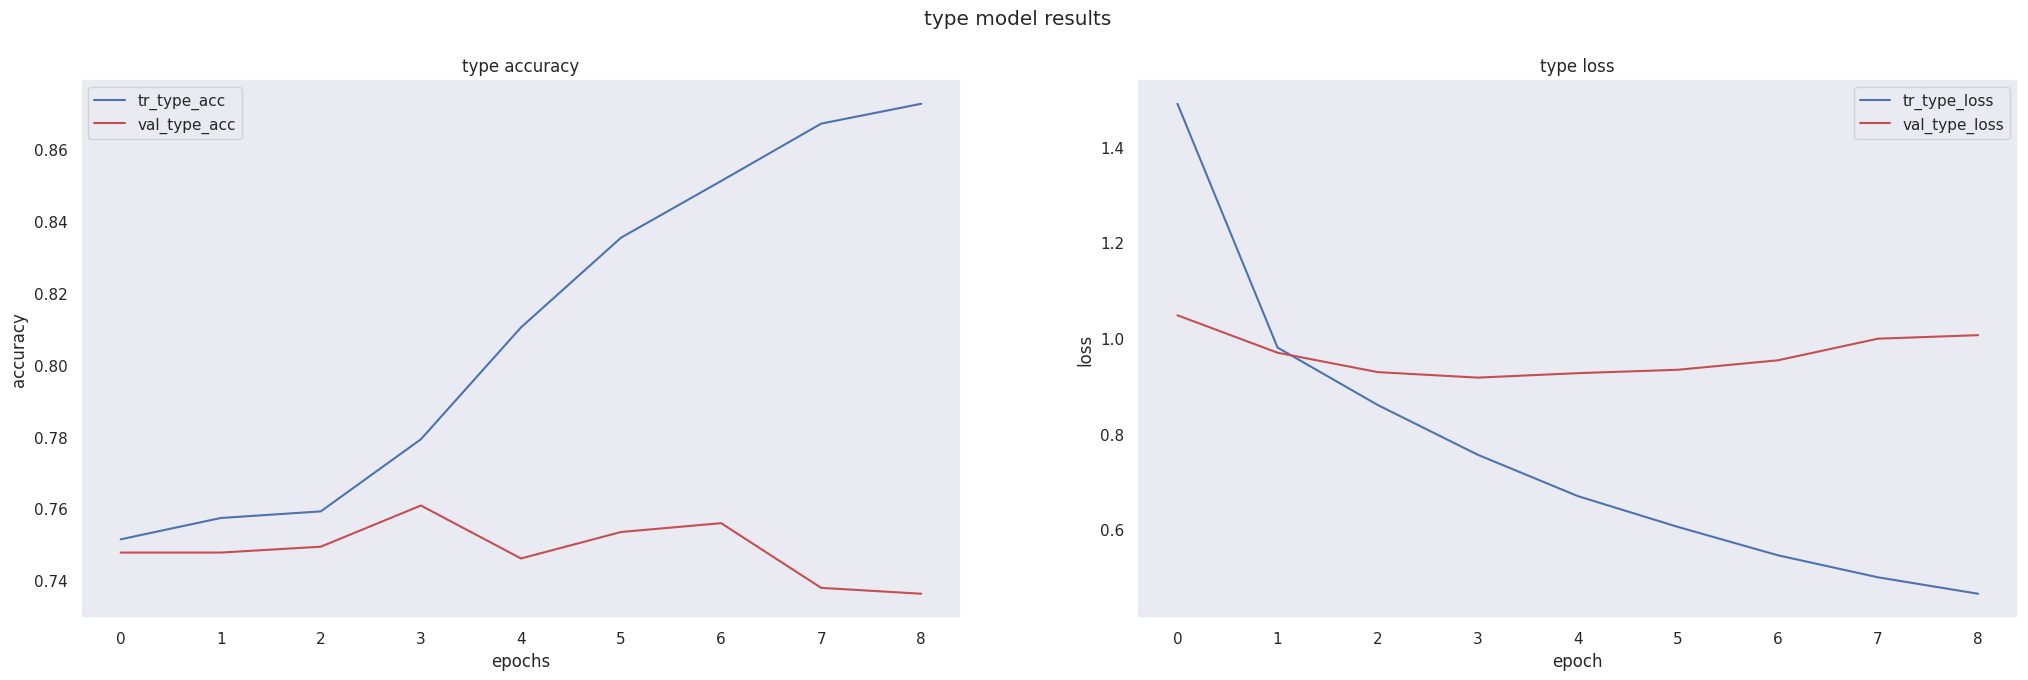

In [ ]:
train_val_loss_plt_type(history_SS_T4)


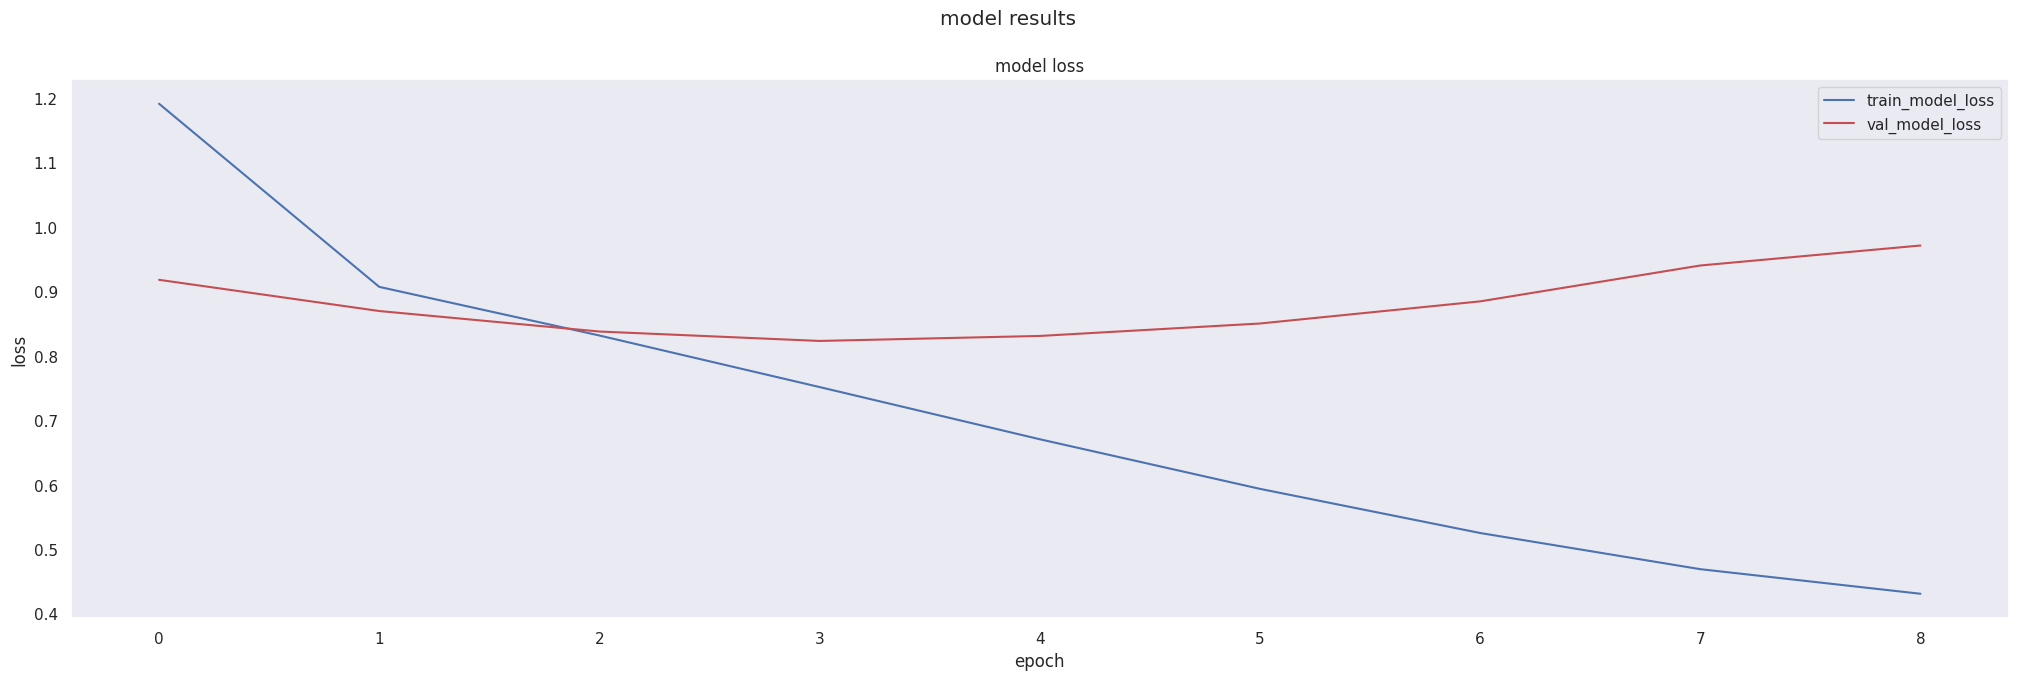

In [ ]:
train_val_loss_plt_model(history_SS_T4)


In [ ]:
res_eva=model.evaluate(x= {
     'summary': x_val_summary_1,
        'image': x_val_image_1},
  y= {'price': y_val_price_1,
    'type':y_val_type_1})
print("test loss, test acc:", res_eva)

48/48 [==============================] - 0s 8ms/step - loss: 0.9887 - price_loss: 0.9295 - type_loss: 1.0479 - price_sparse_categorical_accuracy: 0.6304 - type_sparse_categorical_accuracy: 0.7339
test loss, test acc: [0.9887014627456665, 0.9295179843902588, 1.0478845834732056, 0.6304063200950623, 0.7339449524879456]


In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_1,
        'image': x_test_image_1
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 2s 7ms/step
[[0.32611588 0.39673427 0.27714992]
 [0.9611193  0.03215209 0.00672856]
 [0.9734245  0.01325707 0.01331855]
 ...
 [0.2774835  0.4157605  0.30675596]
 [0.97688395 0.01764567 0.00547037]
 [0.04240922 0.71408993 0.24350081]]
[1 0 0 ... 1 0 1]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_1.id,
     'price': price_category_predicted}
).to_csv('sample_submission_T4.csv', index=False)

**it give me a public score in kaggle 0.63396**

**the score here is better than the score in trial 2 and trial 3 but less than the score in trial 1**

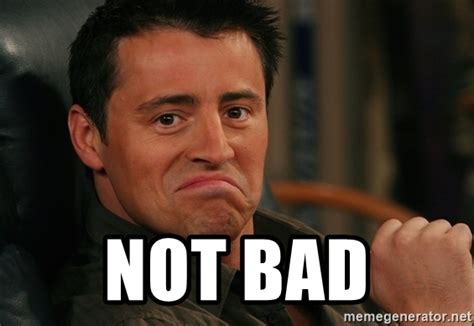



**Trail5**



**in this trial i will use vgg19 transfer  learning model and this i use for image part.**


**and for text part i use embeded layer and  averges layer.**

let us train the model and see the accuracy


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:

from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding.
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# image part 
# simple conv2d and vgg 19 
cov1 = Conv2D(10,(14,14), activation='softmax')(in_image) # 10 number of filters  and  (15, 15) size of filter
vgg=VGG19(weights=None, input_shape=( 51, 51, 10), include_top=False)(cov1)
flattened= Flatten()(vgg)
# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model5= keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model5.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0,
        'price': 2.0,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model5.summary()
     


/usr/local/lib/python3.9/dist-packages/keras/applications/vgg19.py:137: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 10 input channels.
  input_shape = imagenet_utils.obtain_input_shape(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 51, 51, 10)   3930        ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     4000000     ['input_1[0][0]']                
                                                                                              

In [ ]:
history = model5.fit(
   x={
        'summary': x_train_summary_1,
        'image': x_train_image_1
    },
    y={
        'type': y_train_type_1,
        'price': y_train_price_1,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5)
    ],
    verbose=1,
    # class_weight = class_weight
)

Epoch 1/15
293/293 [==============================] - 66s 159ms/step - loss: 1.7170 - price_loss: 0.8585 - type_loss: 3.3037 - price_sparse_categorical_accuracy: 0.6265 - type_sparse_categorical_accuracy: 0.0011 - val_loss: 1.6564 - val_price_loss: 0.8282 - val_type_loss: 3.3281 - val_price_sparse_categorical_accuracy: 0.6212 - val_type_sparse_categorical_accuracy: 8.5324e-04
Epoch 2/15
293/293 [==============================] - 20s 67ms/step - loss: 1.5353 - price_loss: 0.7677 - type_loss: 3.2847 - price_sparse_categorical_accuracy: 0.6523 - type_sparse_categorical_accuracy: 0.0011 - val_loss: 1.5341 - val_price_loss: 0.7670 - val_type_loss: 3.2814 - val_price_sparse_categorical_accuracy: 0.6408 - val_type_sparse_categorical_accuracy: 8.5324e-04
Epoch 3/15
293/293 [==============================] - 16s 56ms/step - loss: 1.3651 - price_loss: 0.6826 - type_loss: 3.2656 - price_sparse_categorical_accuracy: 0.6988 - type_sparse_categorical_accuracy: 0.0011 - val_loss: 1.4781 - val_price_l

In [ ]:
history_SS_T5=history


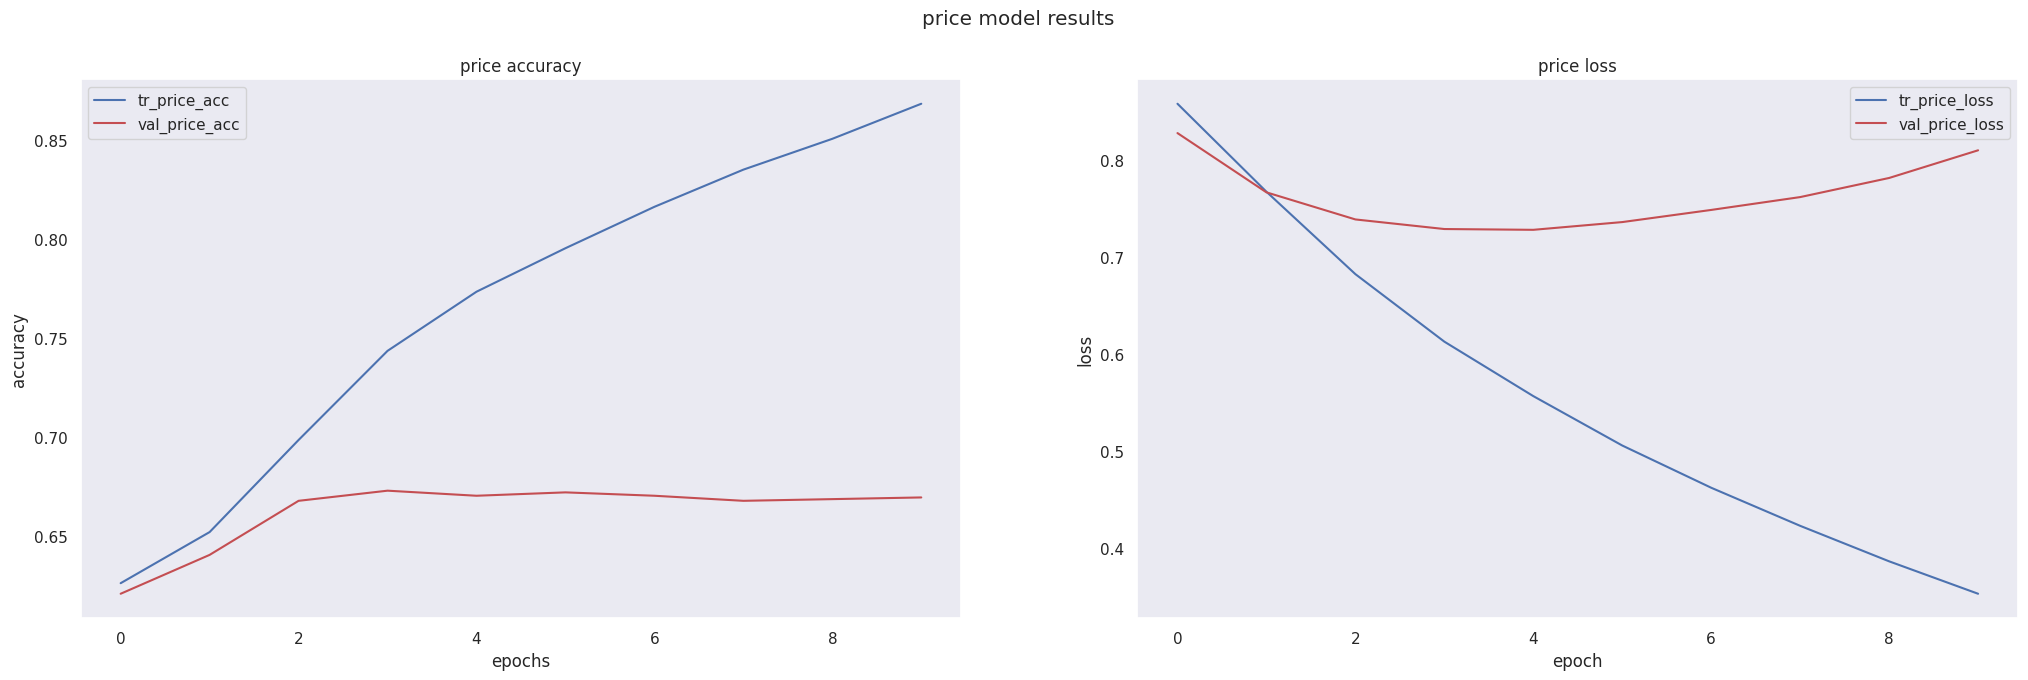

In [ ]:
train_val_loss_plt_price(history_SS_T5)


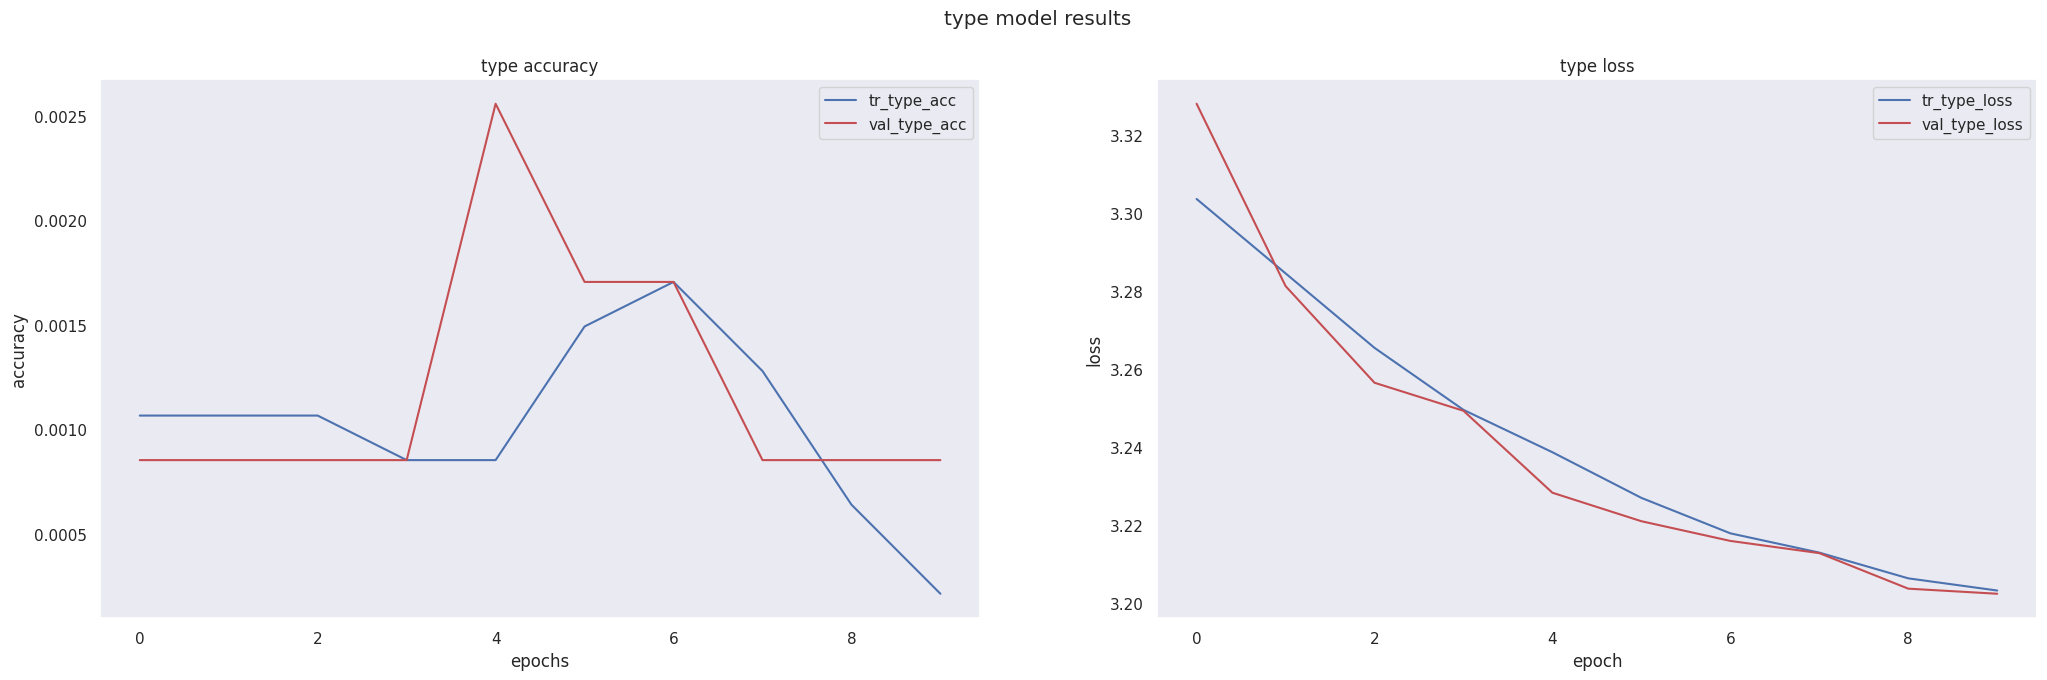

In [ ]:
train_val_loss_plt_type(history_SS_T5)


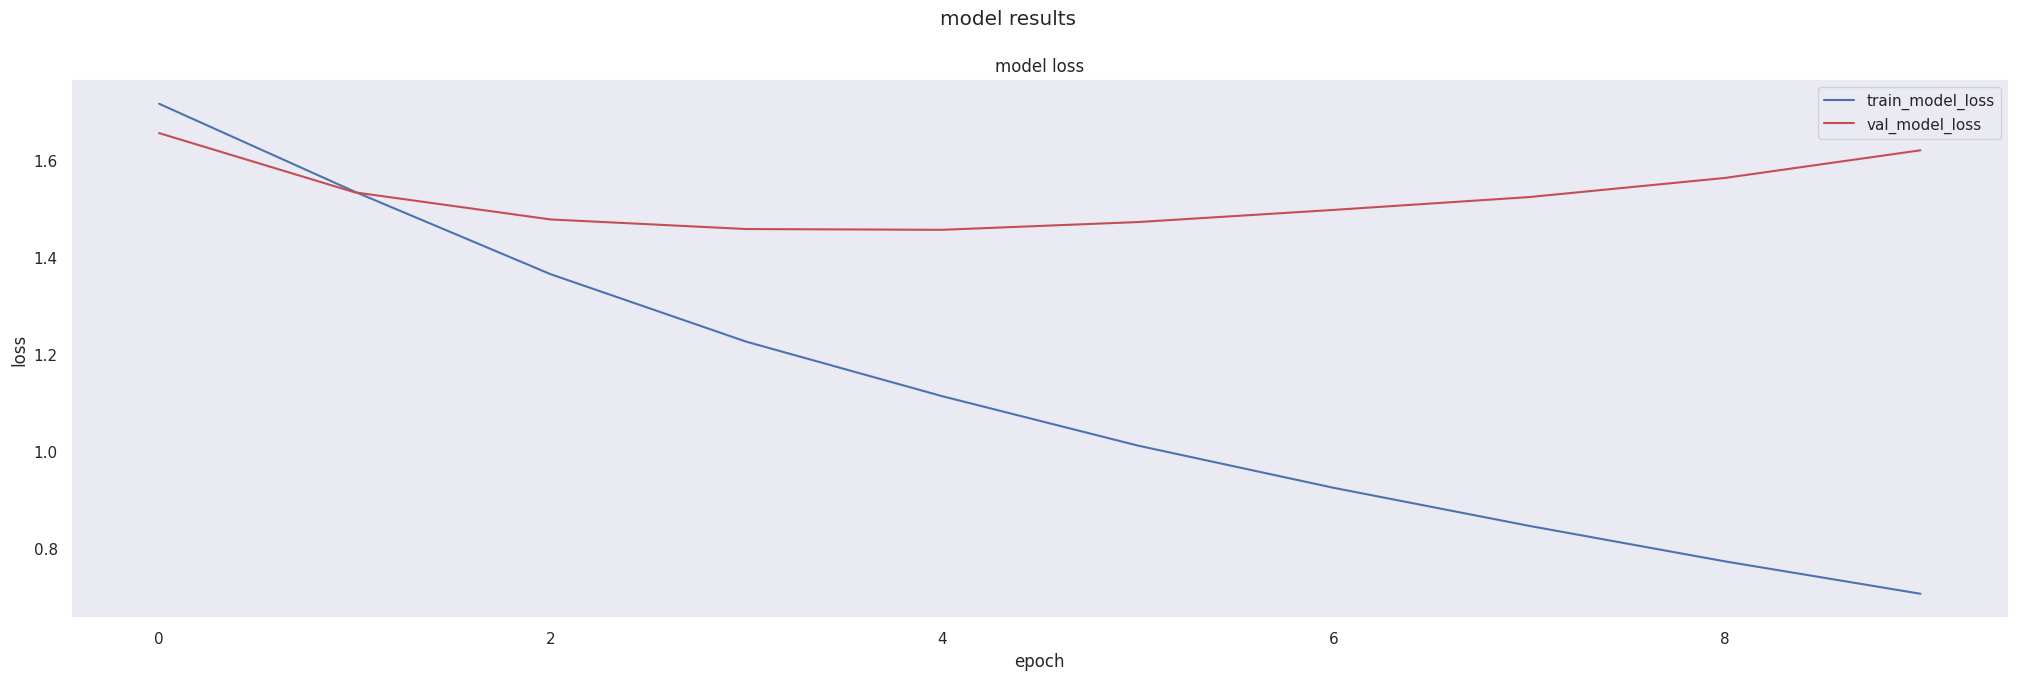

In [ ]:
train_val_loss_plt_model(history_SS_T5)


In [ ]:
res_eva=model5.evaluate(x= {
     'summary': x_val_summary_1,
        'image': x_val_image_1},
  y= {'price': y_val_price_1,
    'type':y_val_type_1})
print("test loss, test acc:", res_eva)

46/46 [==============================] - 2s 27ms/step - loss: 1.5905 - price_loss: 0.7953 - type_loss: 3.2024 - price_sparse_categorical_accuracy: 0.6623 - type_sparse_categorical_accuracy: 0.0000e+00
test loss, test acc: [1.5905280113220215, 0.7952640056610107, 3.202418804168701, 0.6623465418815613, 0.0]


In [ ]:
# we can do prediction on training set
y_predict = model5.predict(
    {
        'summary': x_test_summary_1,
        'image': x_test_image_1
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 3s 14ms/step
[[7.1235454e-01 2.4903764e-01 3.8607795e-02]
 [9.9657995e-01 2.7705012e-03 6.4955367e-04]
 [9.7489357e-01 1.7648732e-02 7.4577071e-03]
 ...
 [8.2199502e-01 1.6064014e-01 1.7364839e-02]
 [9.9742585e-01 1.8208215e-03 7.5325993e-04]
 [8.7352026e-01 1.0645507e-01 2.0024646e-02]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_1.id,
     'price': price_category_predicted}
).to_csv('sample_submission_T5.csv', index=False)

**it gives me a public score  0.6769.**

**it is a good score compare to the score of some trials**

**Trial6**


**THE MASTER MODEL 😎 🏅**

 **trial 6 was some what similar to the model in trial one but i add some additional layers and it was tge model that give me the best score in testing  in all trials in the  note book and in a outside note book i tried to add m ore layers may be the accuracy in testing score be better than this but it  give me alower accuracy so i skip it cause the model overfit.**

 **and the public score this model gives me in kaggle was .68315**



 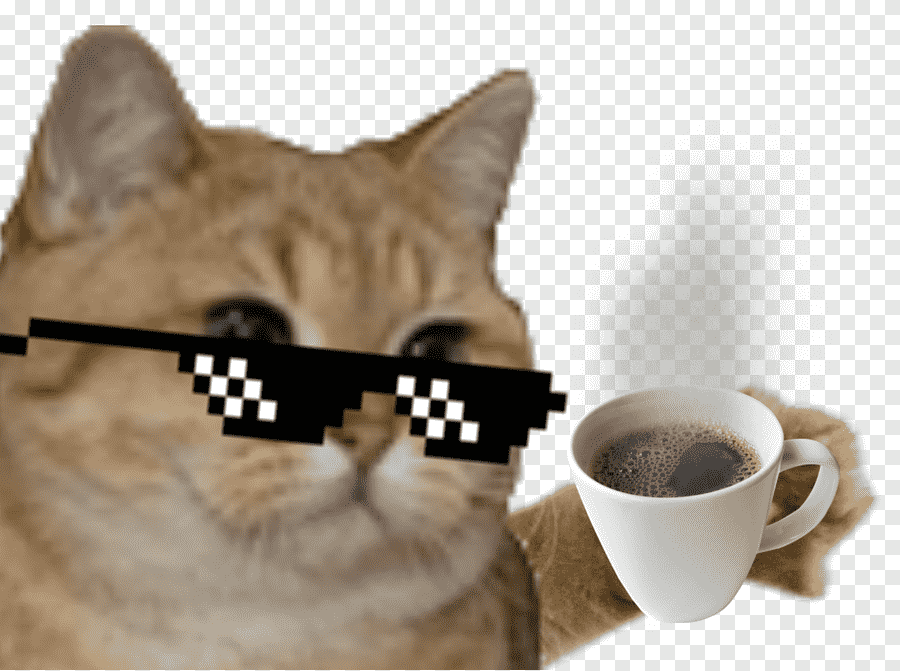







In [148]:
from tensorflow.keras import layers
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# image part 
# simple conv2d
cov1 =layers.Conv2D(15, 15 ,activation='relu')(in_image)
cov2 =layers.Conv2D(10, 10,activation='relu')(cov1)
cov3=layers.Conv2D(15, 15,activation='relu')(cov2)
pl = MaxPool2D((3, 3))(cov3)
flattened = Flatten()(pl)

# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model6 = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model6.compile(
    optimizer=Adam(0.001),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0,
        'price': 1.0,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model6.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 50, 50, 15)   6765        ['input_8[0][0]']                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 41, 41, 10)   15010       ['conv2d_5[0][0]']               
                                                                                                  
 input_7 (InputLayer)           [(None, 100)]        0           []                               
                                                                                            

In [149]:
history = model6.fit(
    x={
        'summary': x_train_summary_1,
        'image': x_train_image_1
    },
    y={
        'type': y_train_type_1,
        'price': y_train_price_1,
    },
    epochs=8,
    batch_size=27,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10, )
    ],
    verbose=1
)

Epoch 1/8
174/174 [==============================] - 23s 108ms/step - loss: 0.9080 - price_loss: 0.9080 - type_loss: 3.1565 - price_sparse_categorical_accuracy: 0.6205 - type_sparse_categorical_accuracy: 0.5789 - val_loss: 0.8315 - val_price_loss: 0.8315 - val_type_loss: 3.1465 - val_price_sparse_categorical_accuracy: 0.6152 - val_type_sparse_categorical_accuracy: 0.5546
Epoch 2/8
174/174 [==============================] - 11s 65ms/step - loss: 0.8021 - price_loss: 0.8021 - type_loss: 3.1479 - price_sparse_categorical_accuracy: 0.6261 - type_sparse_categorical_accuracy: 0.3795 - val_loss: 0.8113 - val_price_loss: 0.8113 - val_type_loss: 3.1469 - val_price_sparse_categorical_accuracy: 0.6212 - val_type_sparse_categorical_accuracy: 0.3029
Epoch 3/8
174/174 [==============================] - 7s 41ms/step - loss: 0.7681 - price_loss: 0.7681 - type_loss: 3.1488 - price_sparse_categorical_accuracy: 0.6382 - type_sparse_categorical_accuracy: 0.2112 - val_loss: 0.7841 - val_price_loss: 0.7841 

In [150]:
history_SS_T6=history


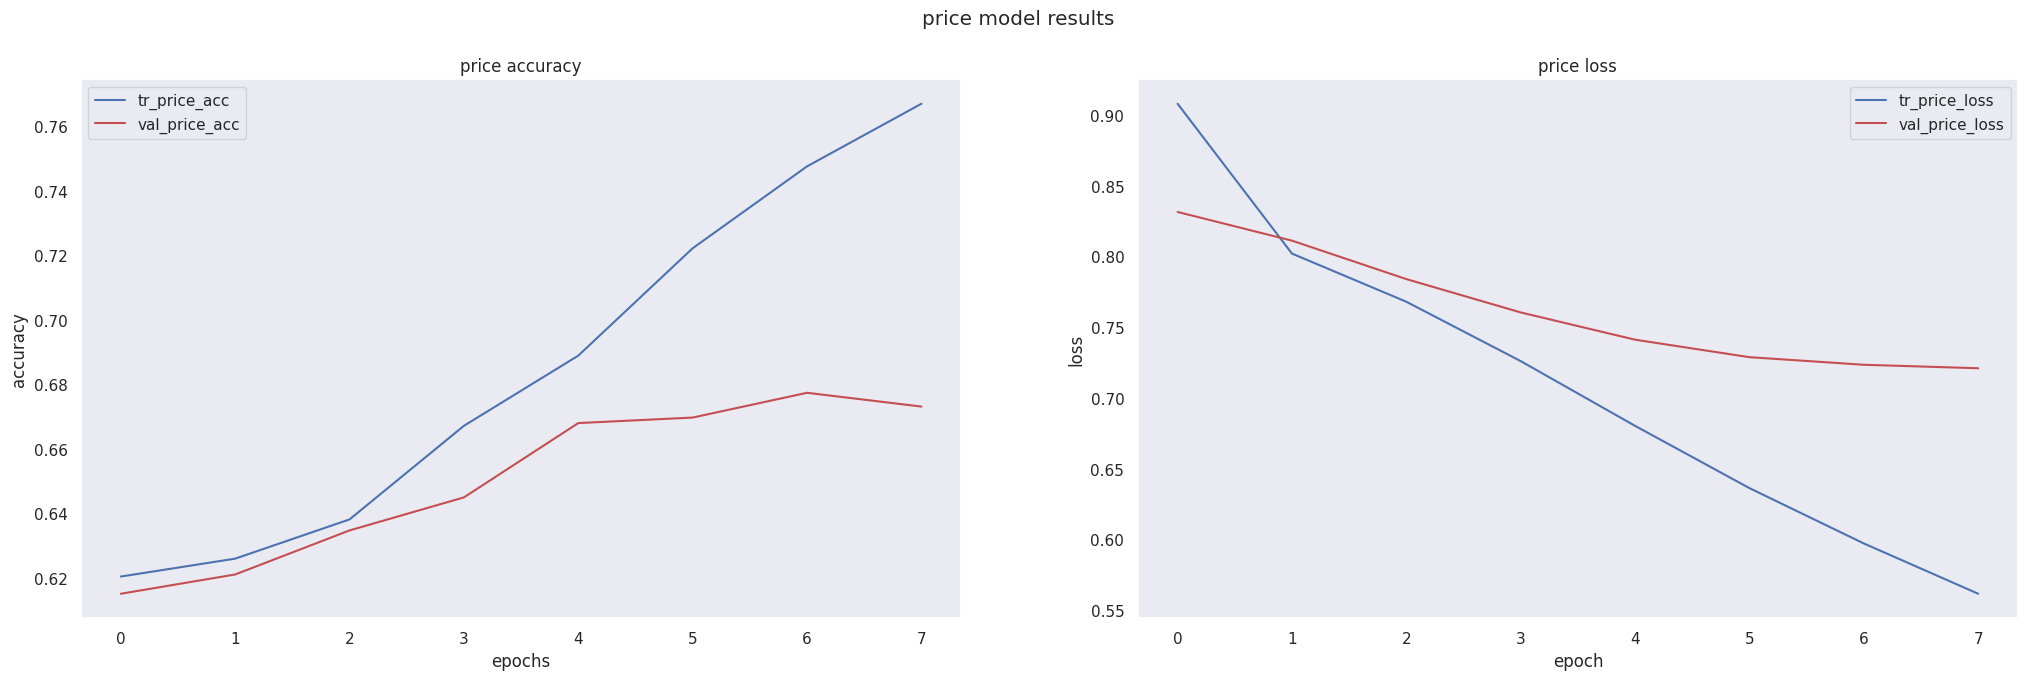

In [151]:
train_val_loss_plt_price(history_SS_T6)


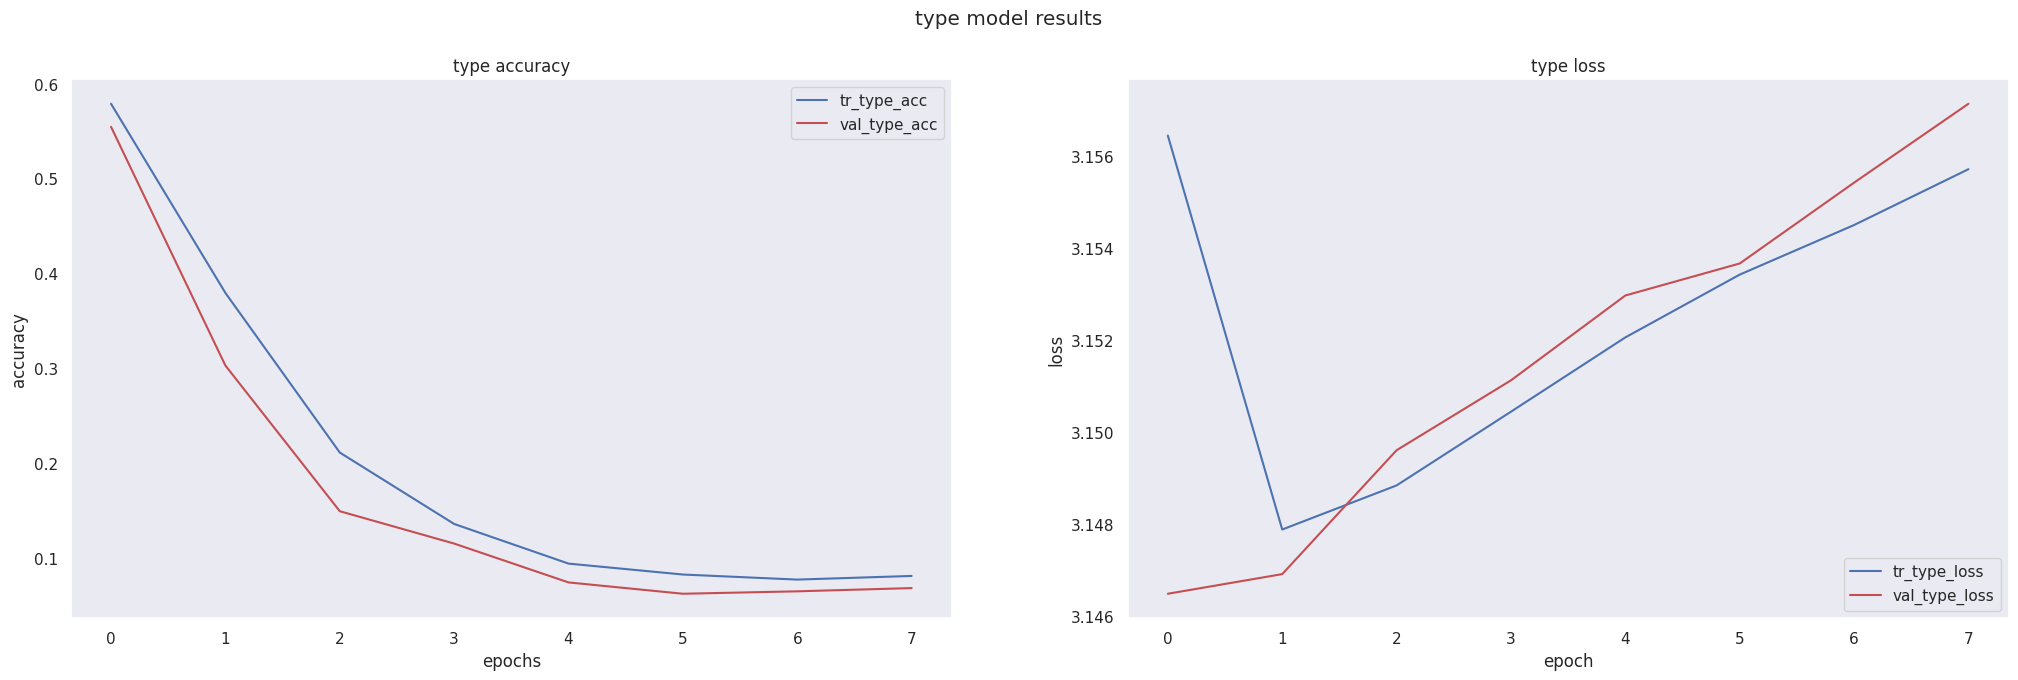

In [152]:
train_val_loss_plt_type(history_SS_T6)


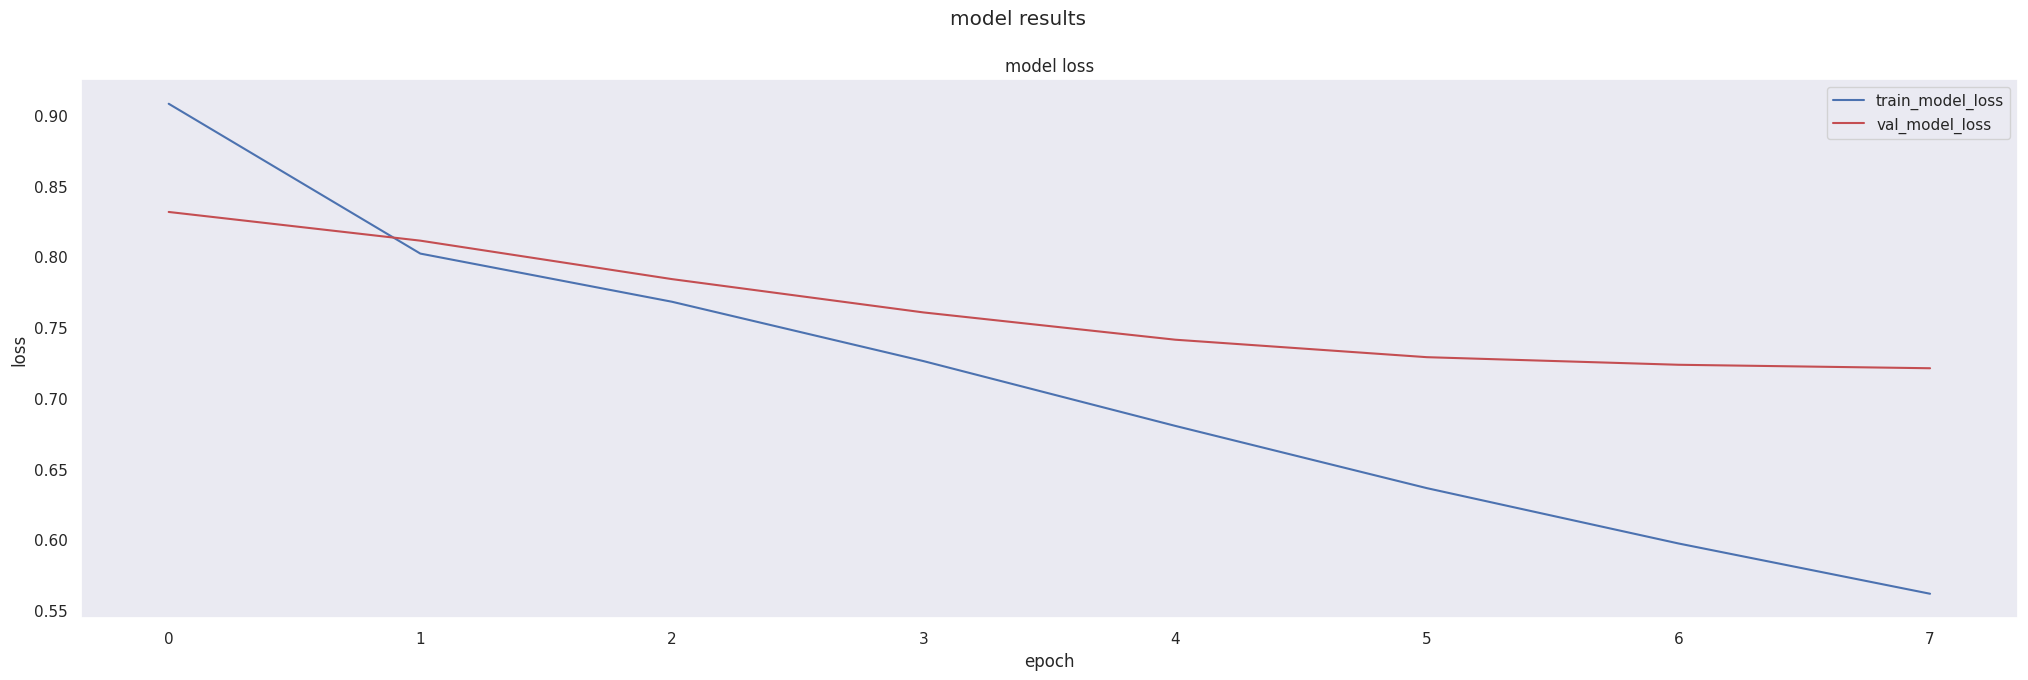

In [153]:
train_val_loss_plt_model(history_SS_T6)


In [154]:
res_eva=model6.evaluate(x= {
     'summary': x_val_summary_1,
        'image': x_val_image_1},
  y= {'price': y_val_price_1,
    'type':y_val_type_1})
print("test loss, test acc:", res_eva)

46/46 [==============================] - 0s 5ms/step - loss: 0.7110 - price_loss: 0.7110 - type_loss: 3.1561 - price_sparse_categorical_accuracy: 0.6780 - type_sparse_categorical_accuracy: 0.0764
test loss, test acc: [0.711039662361145, 0.711039662361145, 3.1561100482940674, 0.6780354976654053, 0.07639836519956589]


In [155]:
# we can do prediction on training set
y_predict = model6.predict(
    {
        'summary': x_test_summary_1,
        'image': x_test_image_1
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 1s 3ms/step
[[0.7321781  0.2256062  0.0422157 ]
 [0.91605604 0.07159887 0.01234515]
 [0.8178651  0.15087579 0.03125918]
 ...
 [0.7496909  0.21565299 0.03465608]
 [0.9289388  0.05822016 0.01284108]
 [0.7092416  0.2509617  0.03979663]]
[0 0 0 ... 0 0 0]


In [81]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_1.id,
     'price': price_category_predicted}
).to_csv('trail_6.csv', index=False)

**trial7**


in trial 7 for i use for text part embeded layer and bi gru layer  and for image part i use conv2D model and maxpool2D and drop out layers  and i gtrianes my model let us see what would be the accuracy  ⏸

In [170]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
bi_GRU =  keras.layers.Bidirectional(keras.layers.GRU(20, recurrent_regularizer='l2'))(embedded) # adding quadratic regularizer

# image part
cov = Conv2D(32, (3, 3))(in_image) 
drop = Dropout(0.2)(cov) 
pl = MaxPool2D((3, 3))(drop) 
cov2 = Conv2D(32, (2,2))(pl) 
drop2 = Dropout(0.2)(cov2) 
pl2 = MaxPool2D((2,2))(drop2) 
flattened = Flatten()(pl2) 
 

# fusion:
fused = tf.concat([bi_GRU, flattened], axis=-1) # concatenate text features with images

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_12 (Conv2D)             (None, 62, 62, 32)   608         ['input_15[0][0]']               
                                                                                                  
 dropout_9 (Dropout)            (None, 62, 62, 32)   0           ['conv2d_12[0][0]']              
                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 20, 20, 32)  0           ['dropout_9[0][0]']              
                                                                                            

In [157]:
history = model.fit(
    x={
        'summary': x_train_summary_1,
        'image': x_train_image_1
    },
    y={
        'type': y_train_type_1,
        'price': y_train_price_1,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10, )
    ],
    verbose=1
)

Epoch 1/15
293/293 [==============================] - 39s 117ms/step - loss: 1.0732 - price_loss: 0.8349 - type_loss: 1.0996 - price_sparse_categorical_accuracy: 0.6297 - type_sparse_categorical_accuracy: 0.7513 - val_loss: 0.9338 - val_price_loss: 0.7942 - val_type_loss: 1.0472 - val_price_sparse_categorical_accuracy: 0.6408 - val_type_sparse_categorical_accuracy: 0.7645
Epoch 2/15
293/293 [==============================] - 9s 31ms/step - loss: 0.8287 - price_loss: 0.7321 - type_loss: 0.9031 - price_sparse_categorical_accuracy: 0.6679 - type_sparse_categorical_accuracy: 0.7553 - val_loss: 0.8451 - val_price_loss: 0.7625 - val_type_loss: 0.9057 - val_price_sparse_categorical_accuracy: 0.6647 - val_type_sparse_categorical_accuracy: 0.7696
Epoch 3/15
293/293 [==============================] - 5s 18ms/step - loss: 0.7390 - price_loss: 0.6450 - type_loss: 0.7986 - price_sparse_categorical_accuracy: 0.7259 - type_sparse_categorical_accuracy: 0.7762 - val_loss: 0.8775 - val_price_loss: 0.798

In [158]:
history_T3=history


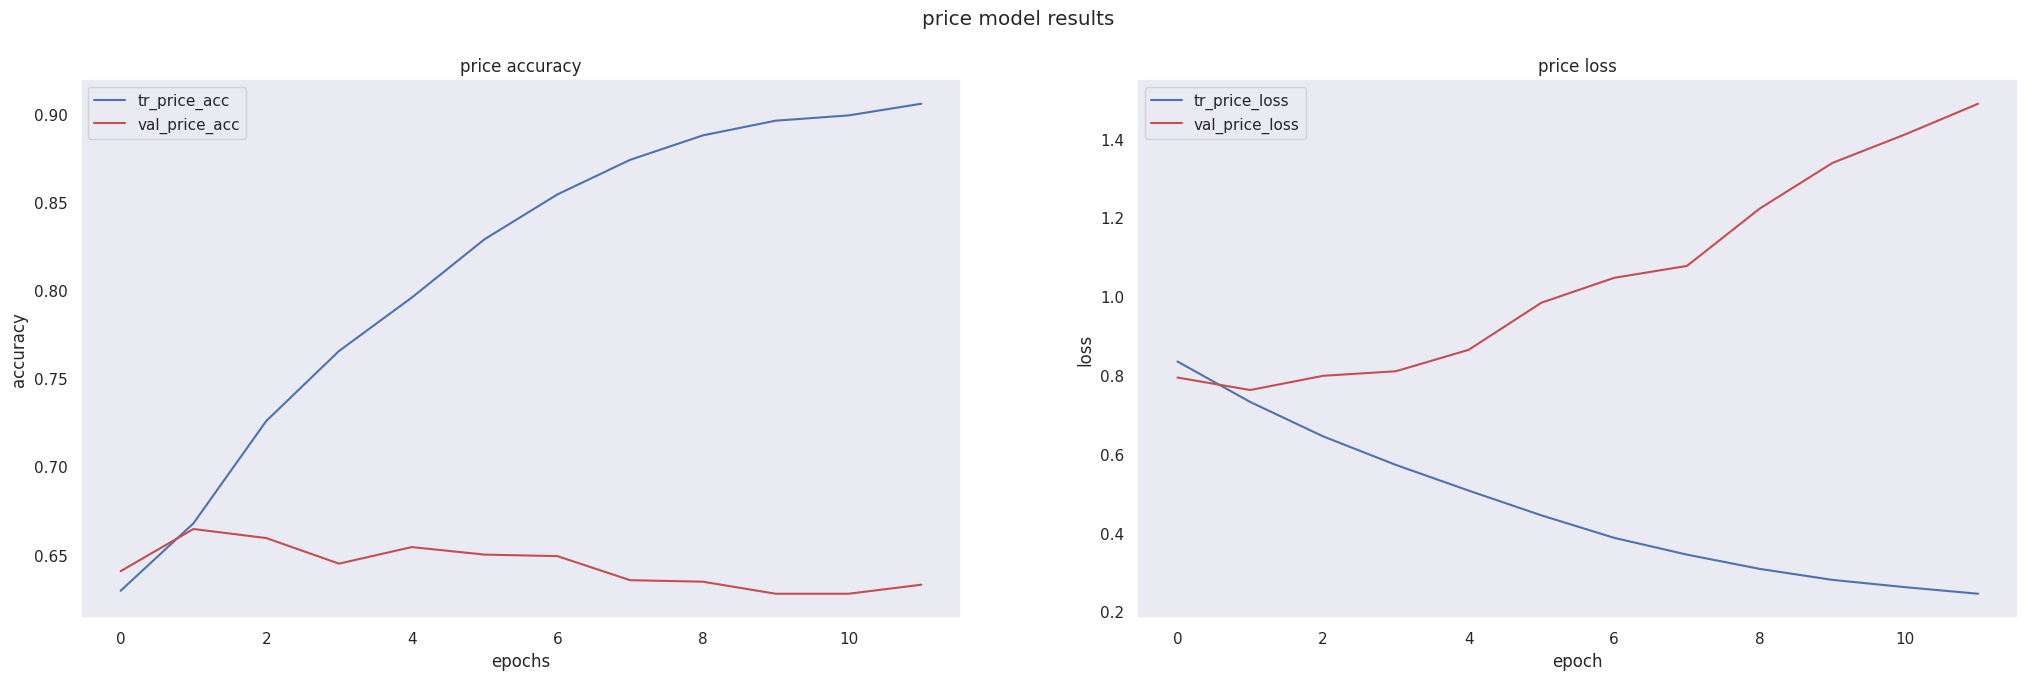

In [159]:
train_val_loss_plt_price(history_T3)

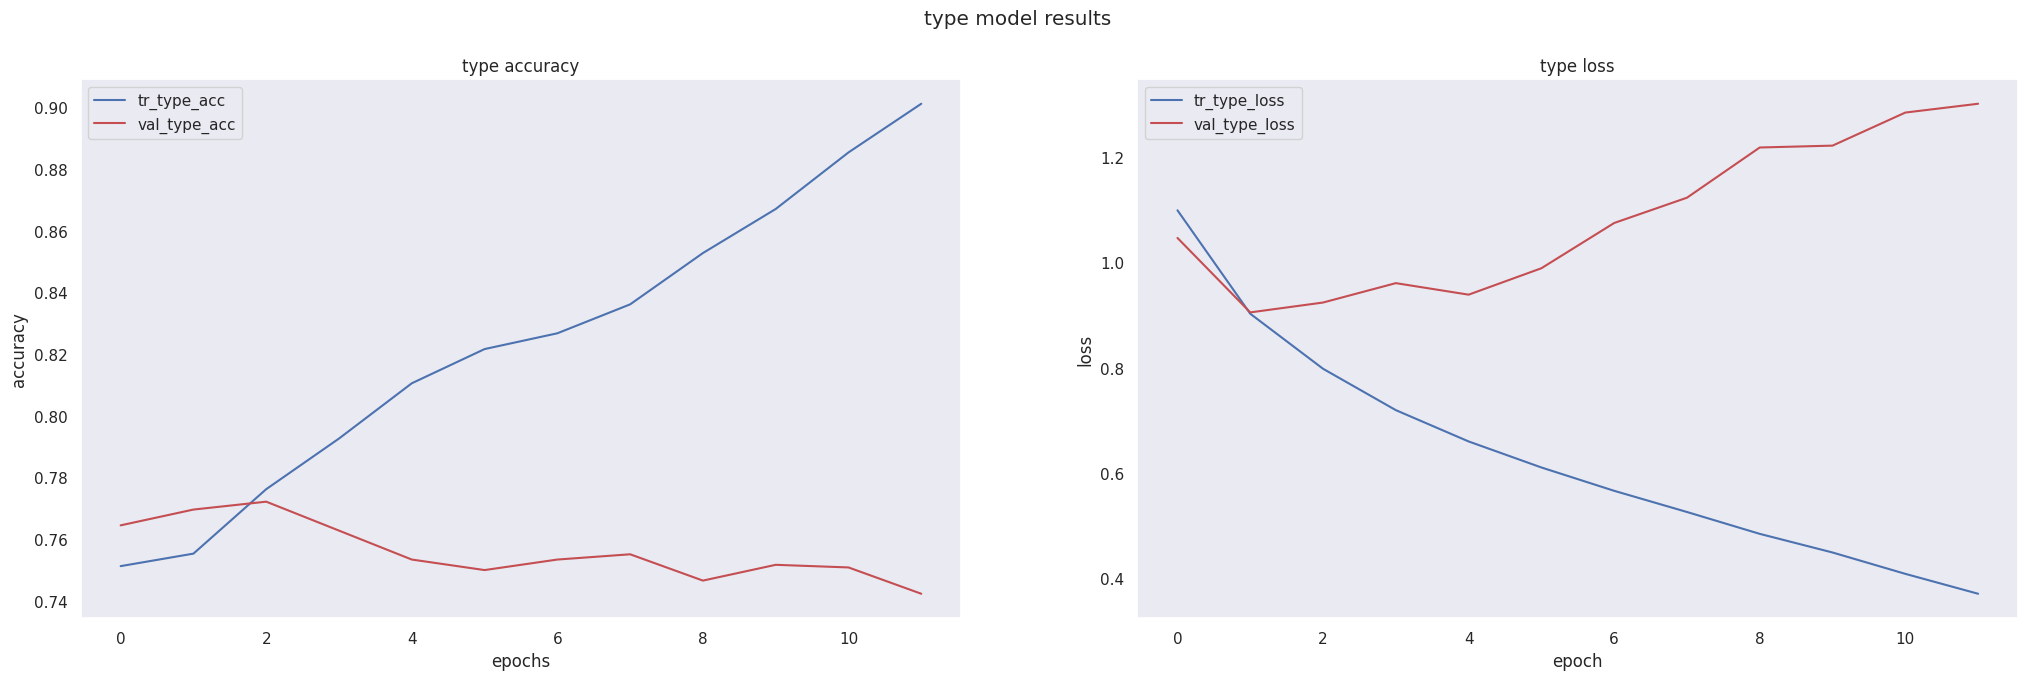

In [160]:
train_val_loss_plt_type(history_T3)


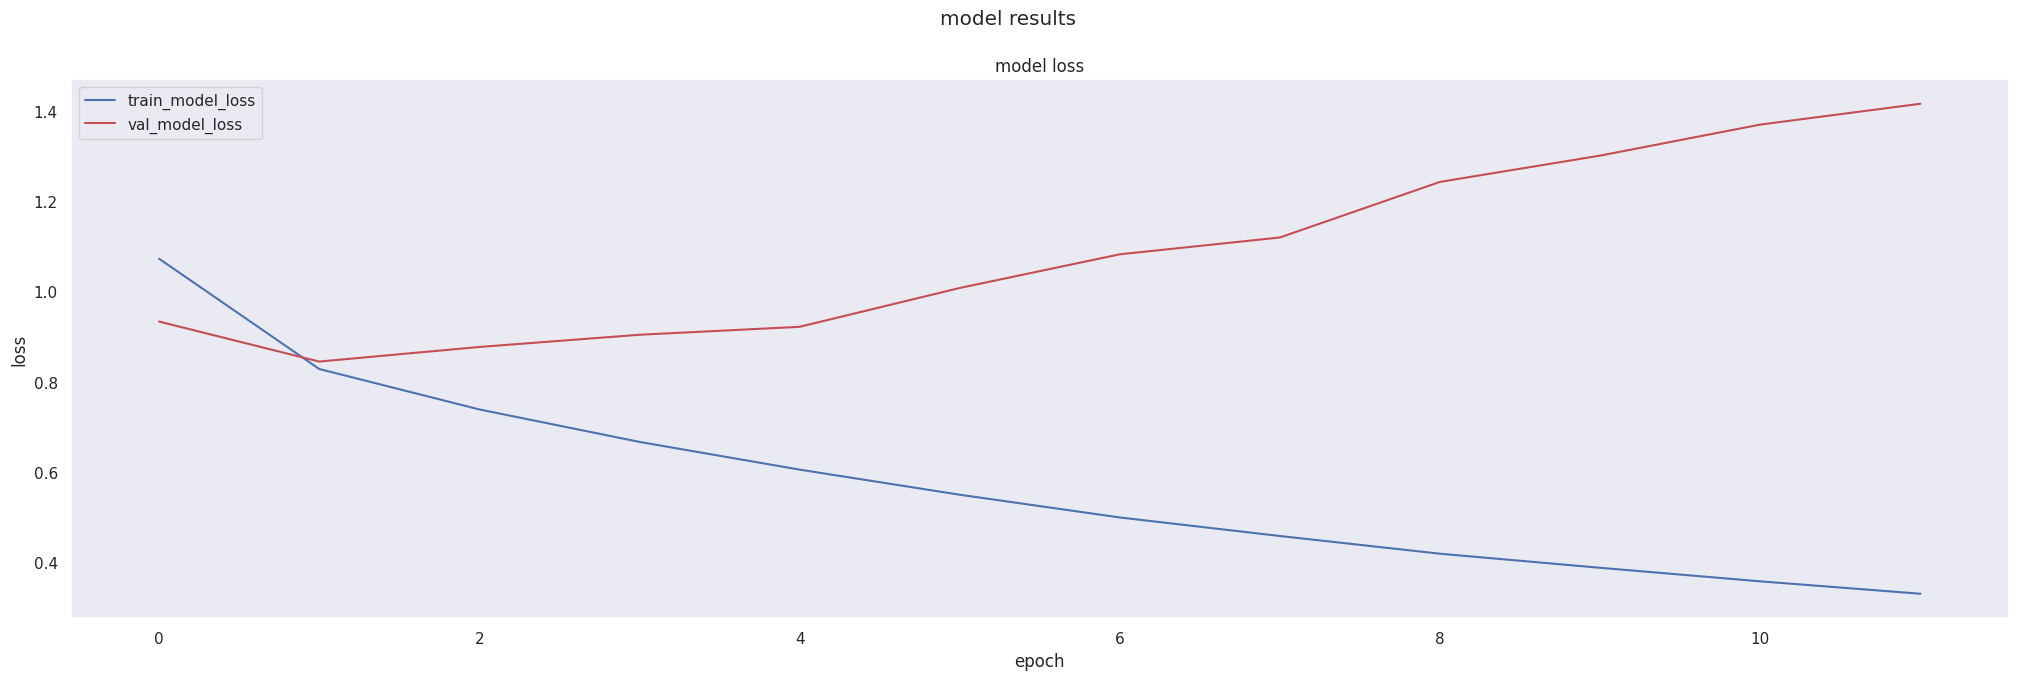

In [161]:
train_val_loss_plt_model(history_T3)


In [162]:
res_eva=model.evaluate(x= {
     'summary': x_val_summary_1,
        'image': x_val_image_1},
  y= {'price': y_val_price_1,
    'type':y_val_type_1})
print("test loss, test acc:", res_eva)

46/46 [==============================] - 0s 8ms/step - loss: 1.4767 - price_loss: 1.4780 - type_loss: 1.4328 - price_sparse_categorical_accuracy: 0.6371 - type_sparse_categorical_accuracy: 0.7353
test loss, test acc: [1.4766532182693481, 1.4780155420303345, 1.4328042268753052, 0.637107789516449, 0.7353342175483704]


In [163]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_1,
        'image': x_test_image_1
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 2s 5ms/step
[[1.8588834e-02 6.9335556e-01 2.8805566e-01]
 [9.9998546e-01 1.4418992e-05 1.7614484e-07]
 [9.9981195e-01 1.7857653e-04 9.5369278e-06]
 ...
 [7.3404950e-01 2.4316266e-01 2.2787822e-02]
 [9.9997973e-01 1.9771227e-05 4.5281178e-07]
 [2.6957721e-02 8.4664625e-01 1.2639610e-01]]
[1 0 0 ... 0 0 1]


In [164]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_1.id,
     'price': price_category_predicted}
).to_csv('Trial_7.csv', index=False)

**this model gives me a public score in kaggle .68179**


and it is the second model that gives me a some how better score 🆗

**trial_8** 

and let's talk about trial 8 the last trial i use in it a single model that take one input that is a text part  and i drop image part as an input from it and i use three layers to train the model one embeded layer and two averaged layers .
the public score in kaggle was somhow good as th two best model 0.68152 . ❗ ❗ ❗ ❗ ❗ 

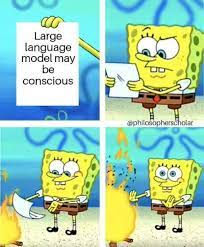





In [165]:
# one inputs, one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # embedding requires to encoded input data to integer encoded, so that each word is represented by a unique integer
averaged = tf.reduce_mean(embedded, axis=1)  # reduce_mean that compute the mean value of embeddded
averaged= Dropout(0.6)(averaged)# 50% dropout




# fusion - combinig both the text and the image
fused = averaged

# multi-task learning (each is a multi-class classification)
# one dense layer for each task(type and price)
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 100, 100)     4000000     ['input_11[0][0]']               
                                                                                                  
 tf.math.reduce_mean_4 (TFOpLam  (None, 100)         0           ['embedding_6[0][0]']            
 bda)                                                                                             
                                                                                                  
 dropout_6 (Dropout)            (None, 100)          0           ['tf.math.reduce_mean_4[0][

In [166]:
history = model.fit(
    x={
        'summary': x_train_summary_1,
    },
    y={
        'type': y_train_type_1,
        'price': y_train_price_1,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10, )
    ],
    verbose=1
)

Epoch 1/15
293/293 [==============================] - 24s 79ms/step - loss: 1.3039 - price_loss: 0.8793 - type_loss: 1.7286 - price_sparse_categorical_accuracy: 0.6197 - type_sparse_categorical_accuracy: 0.7319 - val_loss: 0.9120 - val_price_loss: 0.8316 - val_type_loss: 0.9924 - val_price_sparse_categorical_accuracy: 0.6152 - val_type_sparse_categorical_accuracy: 0.7645
Epoch 2/15
293/293 [==============================] - 6s 20ms/step - loss: 0.9219 - price_loss: 0.8270 - type_loss: 1.0168 - price_sparse_categorical_accuracy: 0.6246 - type_sparse_categorical_accuracy: 0.7543 - val_loss: 0.8908 - val_price_loss: 0.8228 - val_type_loss: 0.9589 - val_price_sparse_categorical_accuracy: 0.6152 - val_type_sparse_categorical_accuracy: 0.7645
Epoch 3/15
293/293 [==============================] - 5s 18ms/step - loss: 0.8940 - price_loss: 0.8089 - type_loss: 0.9791 - price_sparse_categorical_accuracy: 0.6267 - type_sparse_categorical_accuracy: 0.7543 - val_loss: 0.8795 - val_price_loss: 0.8130

In [167]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_1,

    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 0s 2ms/step
[[0.6918945  0.25375968 0.05434583]
 [0.90903425 0.0787202  0.0122455 ]
 [0.7641023  0.18378696 0.05211074]
 ...
 [0.73345304 0.2282137  0.03833328]
 [0.88398916 0.09042473 0.02558612]
 [0.6674541  0.28770843 0.04483745]]
[0 0 0 ... 0 0 0]


In [168]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_1.id,
     'price': price_category_predicted}
).to_csv('sub_T8.csv', index=False)

**NOW i finished my project**

and i want to talk about the best model that give me best public score was the model in trial 6 and in this model i use four types of layers.



for text part i use embeded that cover the word to a fixed length vector and avreged layers.



for image input part i use conv2D and  maxpool2D that reduce the dimensionality.


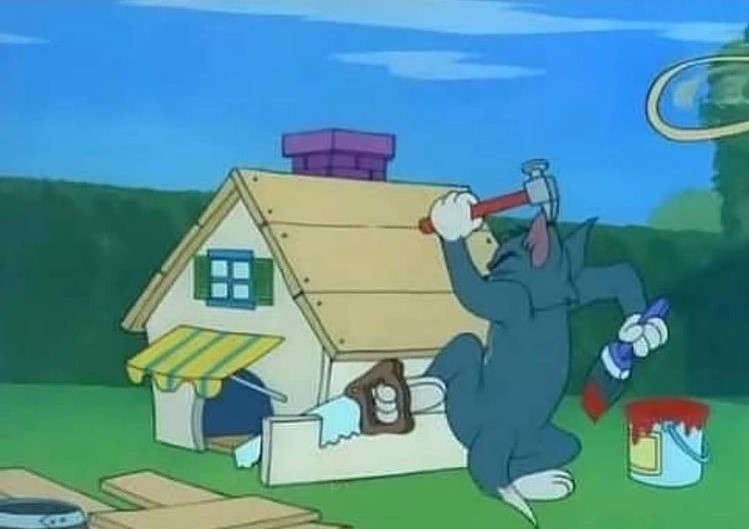

**Q & A**


**1-Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?**

No : because RNNs are better suited to analyzing temporal, sequential data, such as text or videos. A CNN has a different architecture from an RNN. CNNs are "feed-forward neural networks" that use filters and pooling layers, whereas RNNs feed results back into the network When the input image is of size (28x28x3) pixels, a fully connected neural network will have 2352 weights in the first hidden layer. In real life, the images have at least 200x200x3 pixels which results in 120,000 weights in the first hidden layer itself. Having so many parameters will result in overfitting. In such a scenario

No :Fully connected neural networks aren't good for feature extraction.so its not good for image and fully-connected model is not appropriate when our model or one of our layers has more than one input or output, we need to do layer sharing or we want to use a non-linear topology e.g. residual or skip-connection

so CNNs are trained to identify and extract the best features from the images for the problem at hand. That is their main strength. The latter layers of a CNN are fully connected because of their strength as a classifier

**2- What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?**

They are unstable behaviourx happen while model goes backward to learn, gradient vanishing, the gradient get smaller and smaller get smaller and smaller untill it reach to zero, on other hand, gradient explosion, the gradient get larger and larger and this will make weights updated to worset and worset values.

LSTM has three gates (forget gate, input gate, output gate [outputs a prediction vector h(x) at k-th time step]), As a result, LSTM features a distinct gradient structure that allows direct access to the activations of the forget gate, allowing the network to encourage desired behaviour from the error gradient via frequent gate updates at each time step of the learning process, and then throw cell state (∂st'∂st=∏t1t'-tσ(vt+k)) ,vt the output of forget state but still LSTM will suffer from vanishing gradients as well, also LSTM's activation function has the derivative of 1 so it won't neither vanish or explode.

**3- What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?**

Multi-task learning (MTL) is a machine learning discipline in which numerous learning problems are handled concurrently, in other hand Multi-Modality learning makes use of data from multiple sources to produce intelligent predictions, in this assignment we have a special dataset where we have two inputs (summary and image of some real estates) and (type and categorical price of this real estates) I leveraged from these types of learning and I built a model and trained it on these inputs at the same time, and I could predict the values of type and price of the state.

**4-What is the difference among xgboost, lightgbm and catboost?**

**-XGBoost**, CatBoost, and LightGBM have emerged as the most optimized boosting techniques for gradient-boosted tree algorithms

**-XGBoost:**
XGBoost cannot handle categorical
features by itself, it only accepts numerical values similar
to Random Forest. Therefore one has to perform various encodings
like label encoding, mean encoding or one-hot encoding before
supplying categorical data to XGBoost

**CatBoost:**
CatBoost has the flexibility of giving indices of categorical 
columns so that it can be encoded as one-hot encoding 
using one_hot_max_size (Use one-hot encoding for all 
features with number of different values less than or equal 
to the given parameter value)

**LightGBM:**
Similar to CatBoost, LightGBM can also handle categorical 
features by taking the input of feature names. 
It does not convert to one-hot coding, and is much faster than 
one-hot coding. LGBM uses a special algorithm to find the split value of categorical features